# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**TEAM_3BM**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [1]:
# Libraries for data loading, data manipulation and data visulisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy.stats import norm
warnings.filterwarnings('ignore')
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn import metrics

# Libraries for data preparation and model building
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

# Setting global constants to ensure notebook results are reproducible
PARAMETER_CONSTANT = 100.1

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [2]:
df_test = pd.read_csv('df_test.csv')
df_train = pd.read_csv('df_train.csv')# load the data

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


In [3]:
# look at data statistics
df_train.describe().T#creates a dataframe containing descriptive statistics of all features 

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,8763.0,4381.000000,2529.804538,0.000000,2190.500000,4381.000000,6571.500000,8.762000e+03
Madrid_wind_speed,8763.0,2.425729,1.850371,0.000000,1.000000,2.000000,3.333333,1.300000e+01
Bilbao_rain_1h,8763.0,0.135753,0.374901,0.000000,0.000000,0.000000,0.100000,3.000000e+00
Valencia_wind_speed,8763.0,2.586272,2.411190,0.000000,1.000000,1.666667,3.666667,5.200000e+01
Seville_humidity,8763.0,62.658793,22.621226,8.333333,44.333333,65.666667,82.000000,1.000000e+02
Madrid_humidity,8763.0,57.414717,24.335396,6.333333,36.333333,58.000000,78.666667,1.000000e+02
Bilbao_clouds_all,8763.0,43.469132,32.551044,0.000000,10.000000,45.000000,75.000000,1.000000e+02
Bilbao_wind_speed,8763.0,1.850356,1.695888,0.000000,0.666667,1.000000,2.666667,1.266667e+01
Seville_clouds_all,8763.0,13.714748,24.272482,0.000000,0.000000,0.000000,20.000000,9.733333e+01
Bilbao_wind_deg,8763.0,158.957511,102.056299,0.000000,73.333333,147.000000,234.000000,3.593333e+02


- From the above description of the data, all features have 8763 non-null values except for `'Valencia Pressure'` which has 6695 values indicating the presence of null values. 
- The mean and standard deviation of some features such as `Barcelona_pressure` indicate a high variation and spread. Others have low variation and spread (`Barcelona_rain_3h`). A distribution plot will be needed to confirm and visualize this.

Text(0.5, 0, 'Load shortfall (3hrs)')

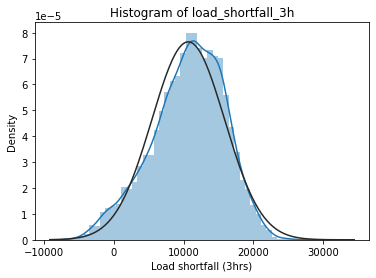

In [4]:
#creating a distribution plot to visualize the distribution of the response variable(load_shorfall_3h)
sns.distplot(df_train['load_shortfall_3h'], fit=norm)#fit = norm parameter fits the distribution shape of
#with a normal distribution
plt.title('Histogram of load_shortfall_3h')
plt.xlabel('Load shortfall (3hrs)')

In [5]:
print("Skewness: {:.6f}".format(df_train['load_shortfall_3h'].skew()))
print("Kurtosis: {:.6f}".format(df_train['load_shortfall_3h'].kurt()))

Skewness: -0.384847
Kurtosis: -0.118999


The response variable follows approximately, a normal distribution as shown in the figure above. With the skew and kurtosis displayed above it can said of the response value to be slightly symmetric and free from outliers. The distribution of the predictors are also displayed below. Since the data pertains to five different cities it is better to group distribution plots displayed according to the kind of data with each group consisiting of the distribution of that variable for each city. That will make it easier to appreciate and perceive the nature of the variable:

In [6]:
# have a look at feature distributions
#creating a definition that takes in a keyword(the environmental conditions)
#returns distribution plots for every column with the keyword
def dist(keyword, capture=False):
    features = [col for col in df_train.columns if col.endswith(keyword)]
    
    #creating subplots taking the number of features into account
    if len(features) == 5:
        fig, axs = plt.subplots(3,2, figsize=(20, 18))
    elif 2 < len(features) < 5:
        fig, axs = plt.subplots(2, 2, figsize=(20, 12))
    else:
        fig, axs = plt.subplots(1, 2, figsize=(20, 7))
    axs = axs.ravel()#flattens the array of subplots from 2D to 1D for ease of iteration

    for i, column in enumerate(features):
        if df_train[column].dtype == 'object':#cleaning has not been performed yet and hence
            #some features are of object type instead of numeric
            axs[i].hist(df_train[column], density='True', alpha=0.5)
        else:
            sns.distplot(df_train[column], ax=axs[i], fit=norm)
        axs[i].set_title('{} Distribution'.format(column))
        axs[i].set_xlabel('{}'.format(column))
    if capture == True:
        fig = plt.gcf()
        fig.patch.set_facecolor('white')
        plt.savefig('{} Distribution.png'.format(keyword), dpi=500, bbox_inches='tight', facecolor='white', pad_inches=2)
    else:
        plt.show()
    

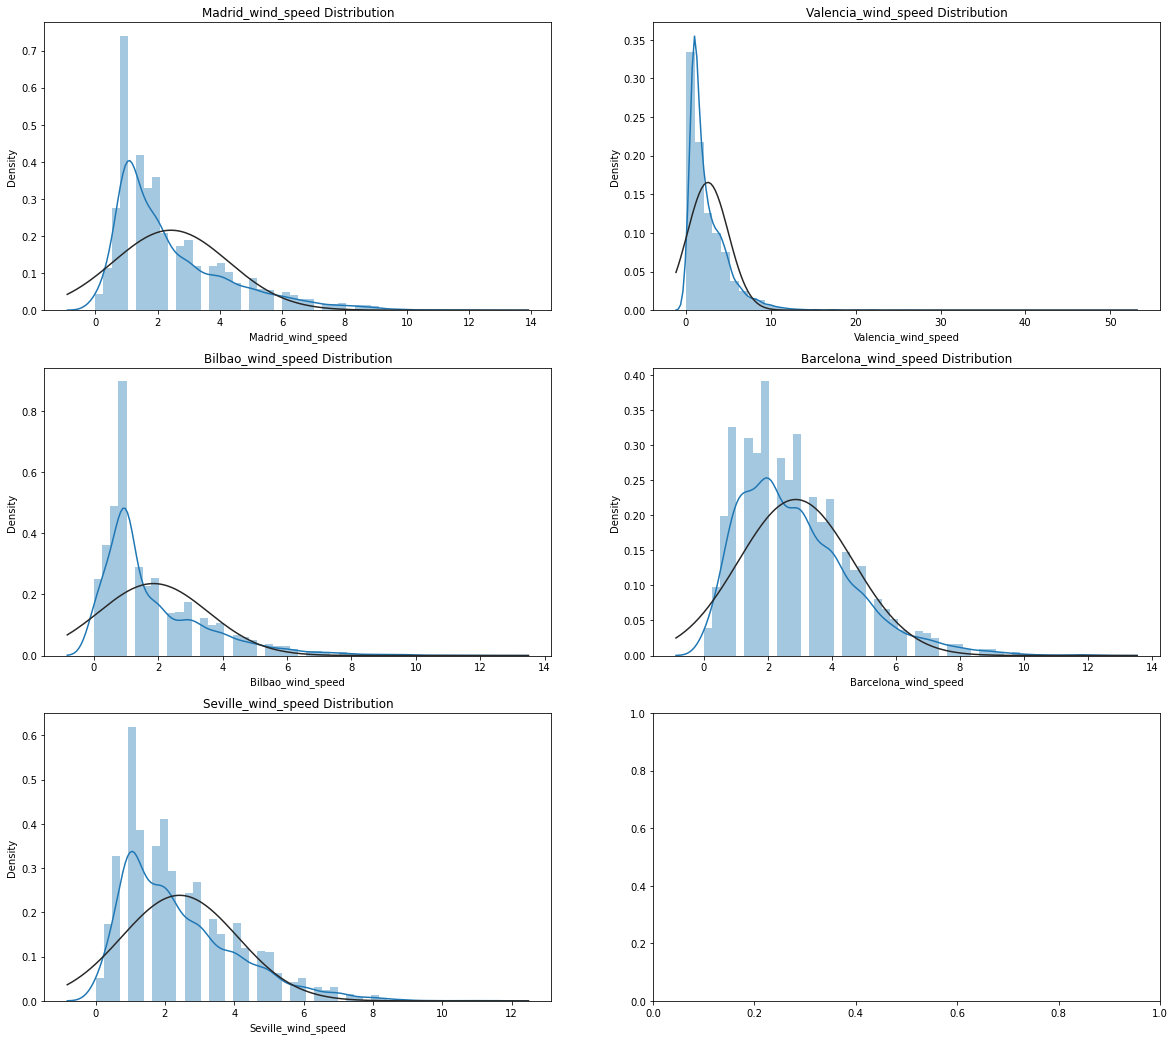

In [7]:
dist('wind_speed')

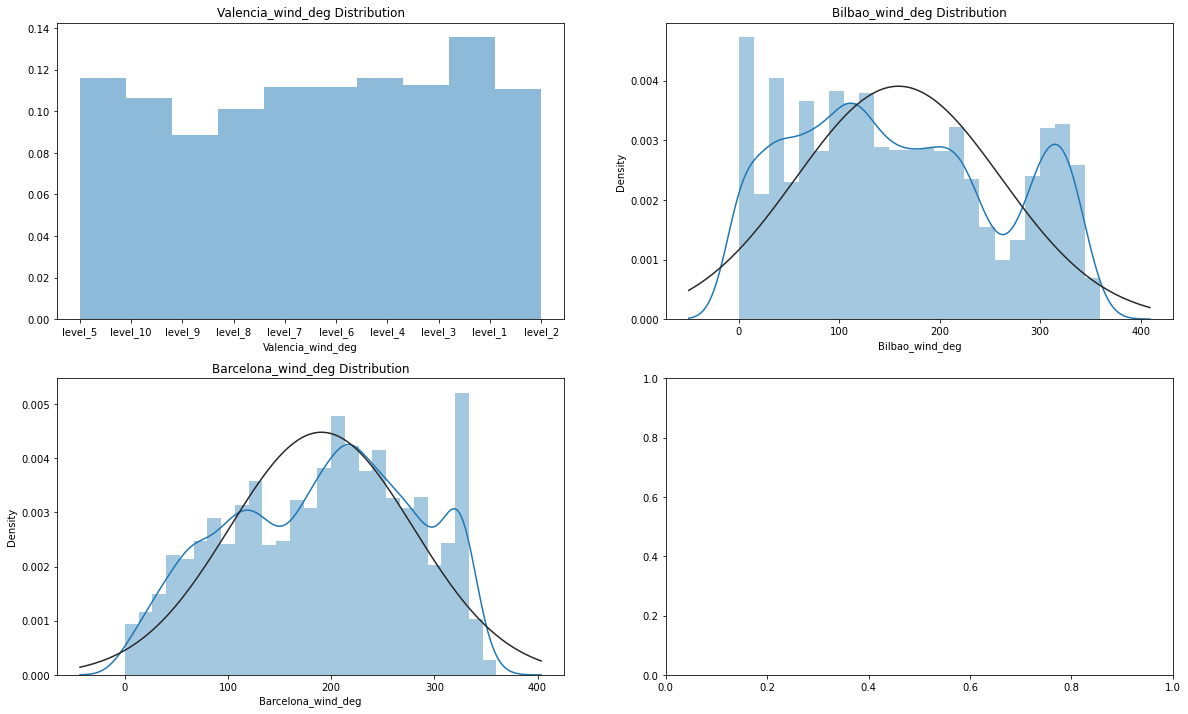

In [8]:
dist('wind_deg')


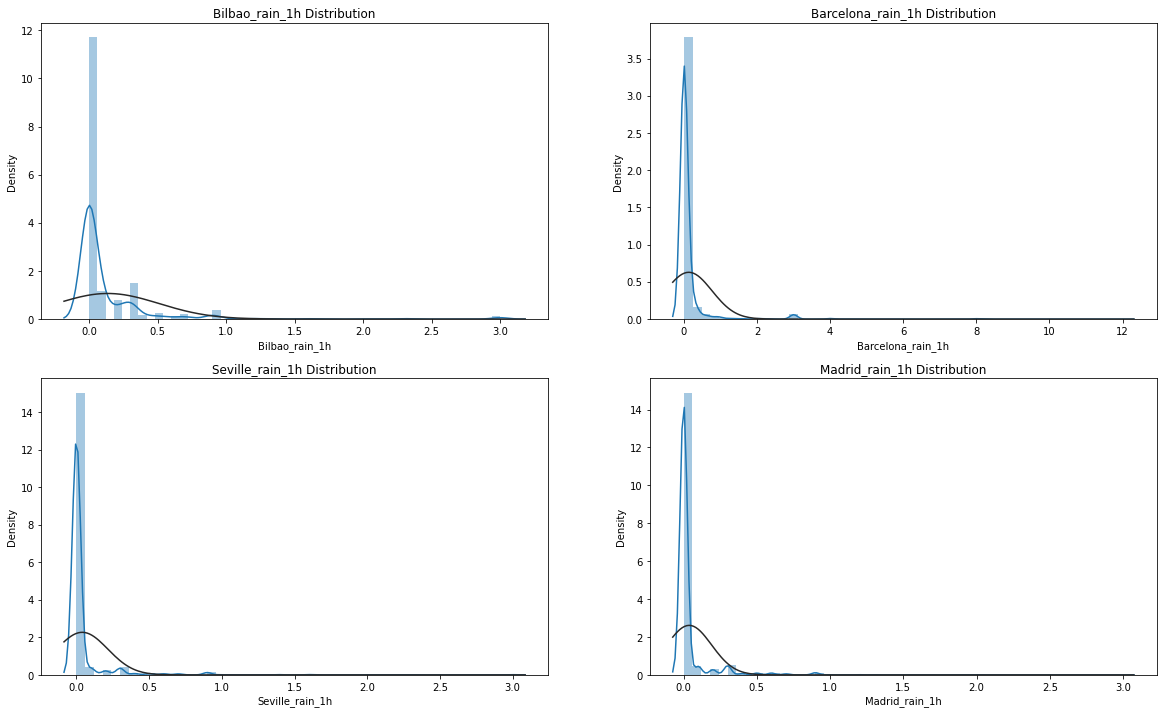

In [9]:
dist('rain_1h', capture=True)


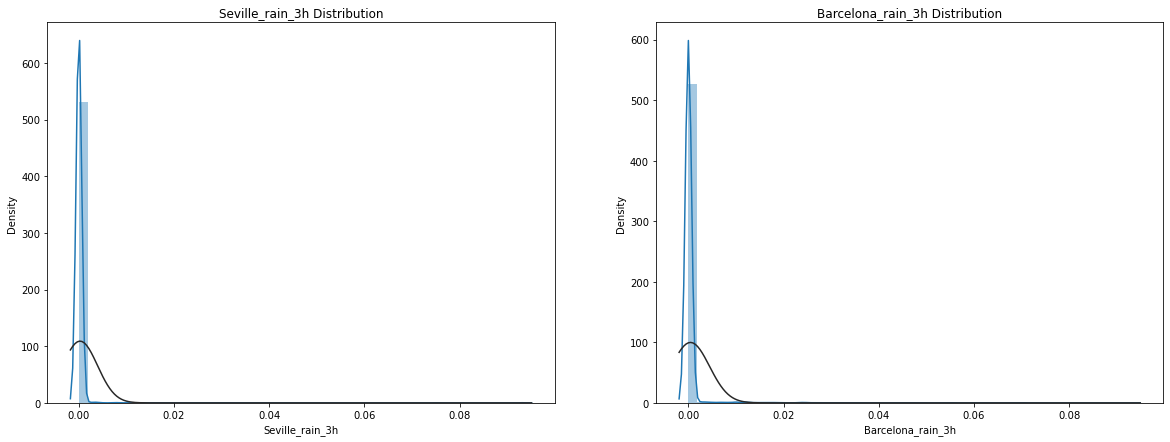

In [10]:
dist('rain_3h')

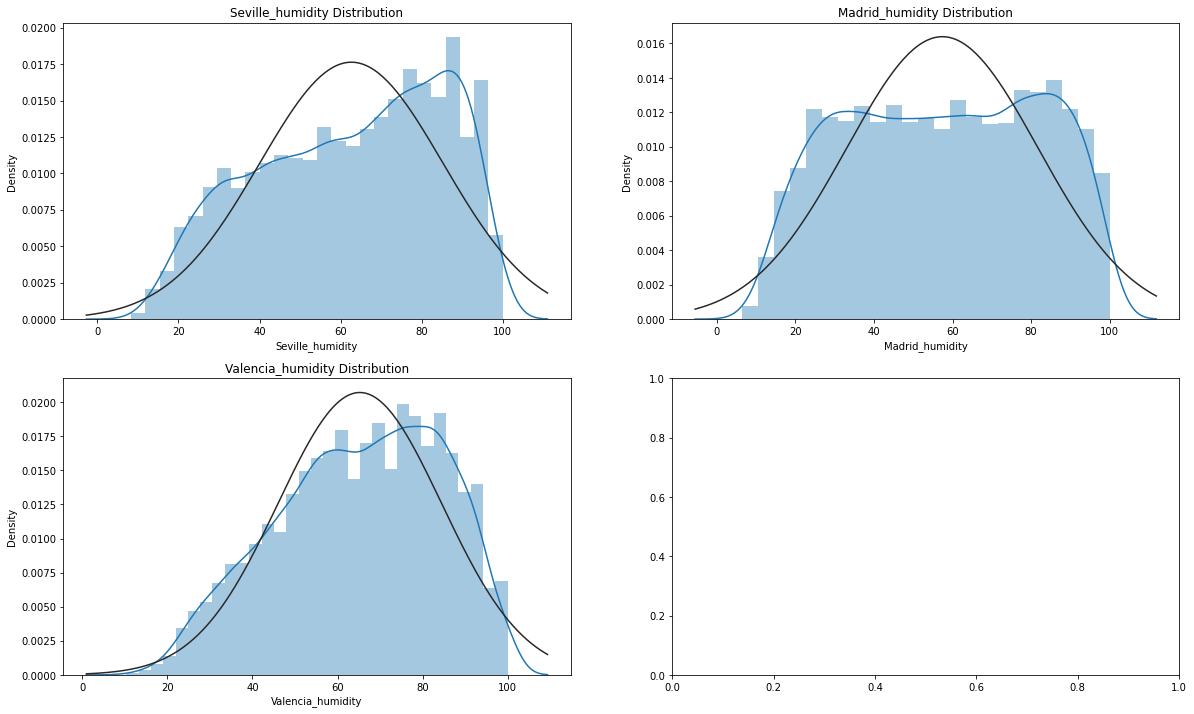

In [11]:
dist('humidity')

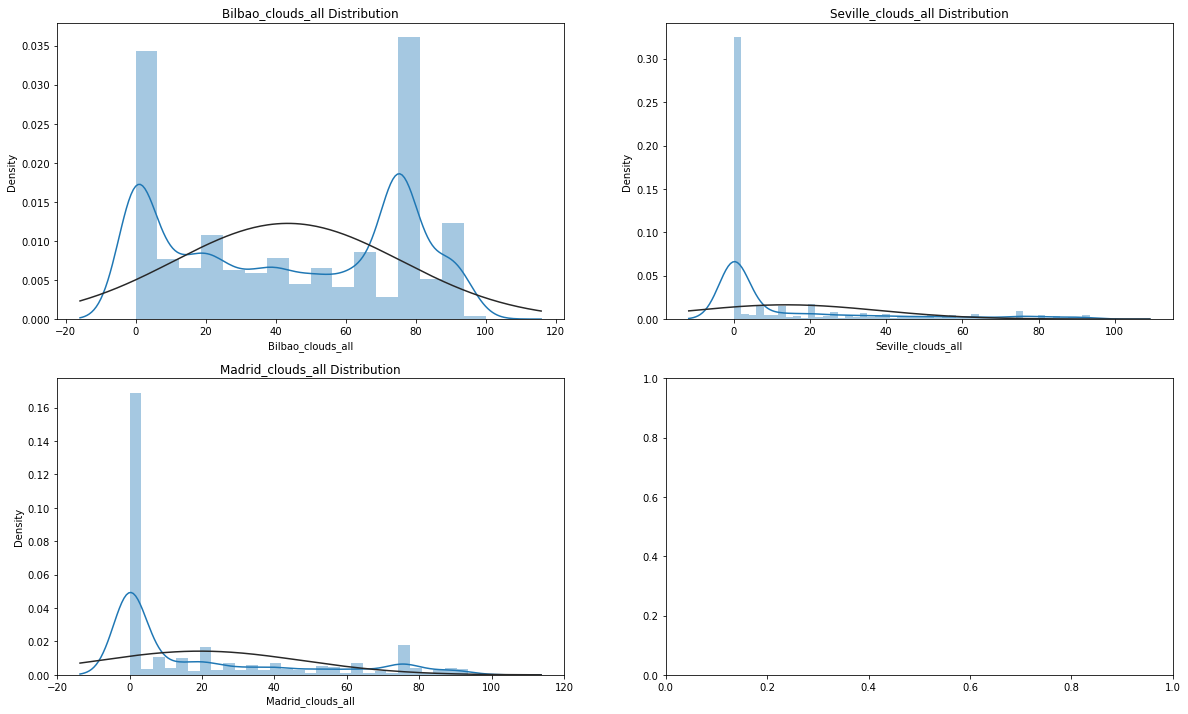

In [12]:
dist('clouds_all')

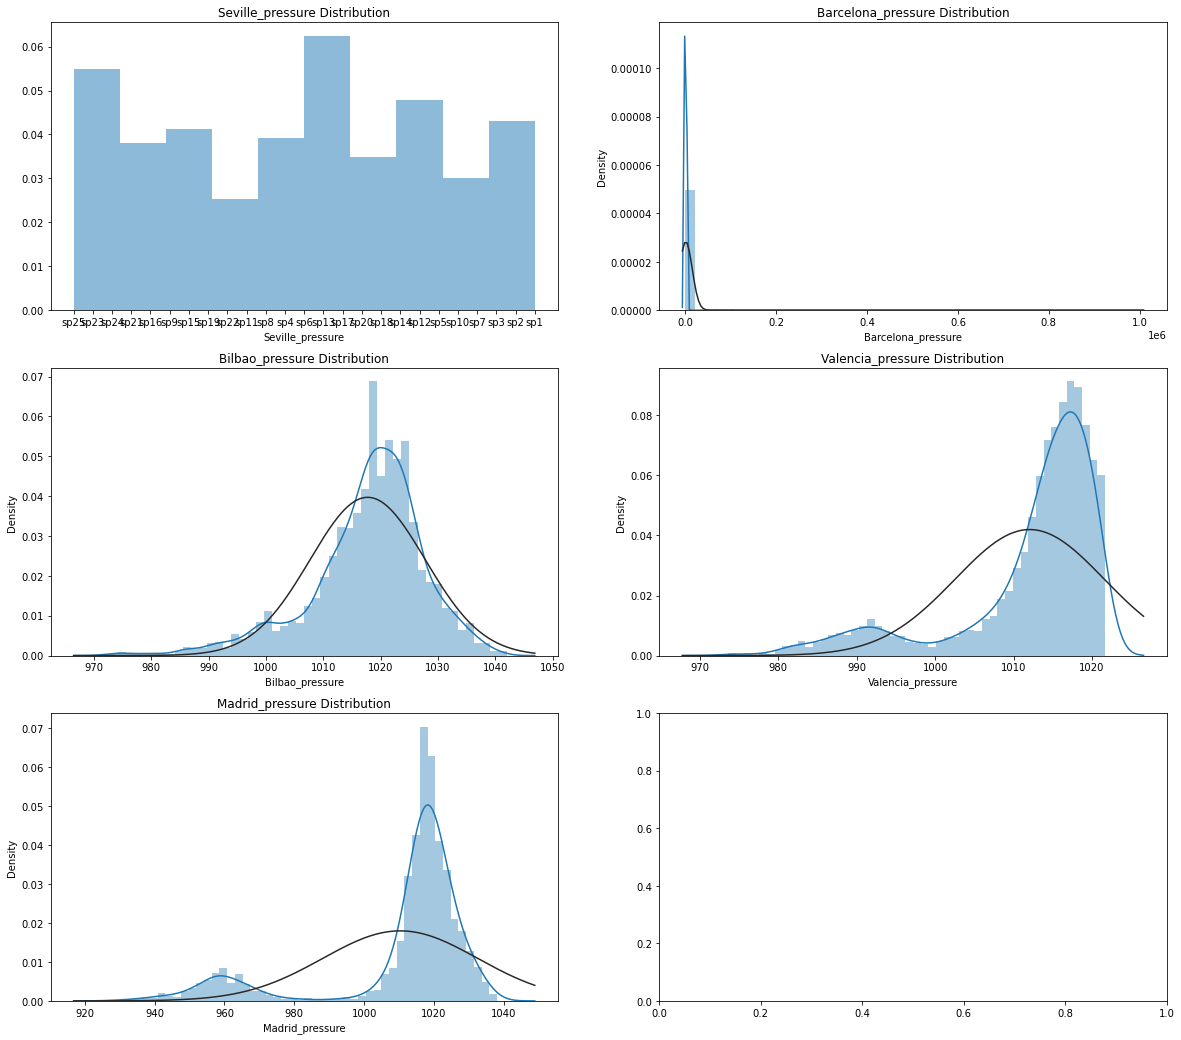

In [13]:
dist('pressure')

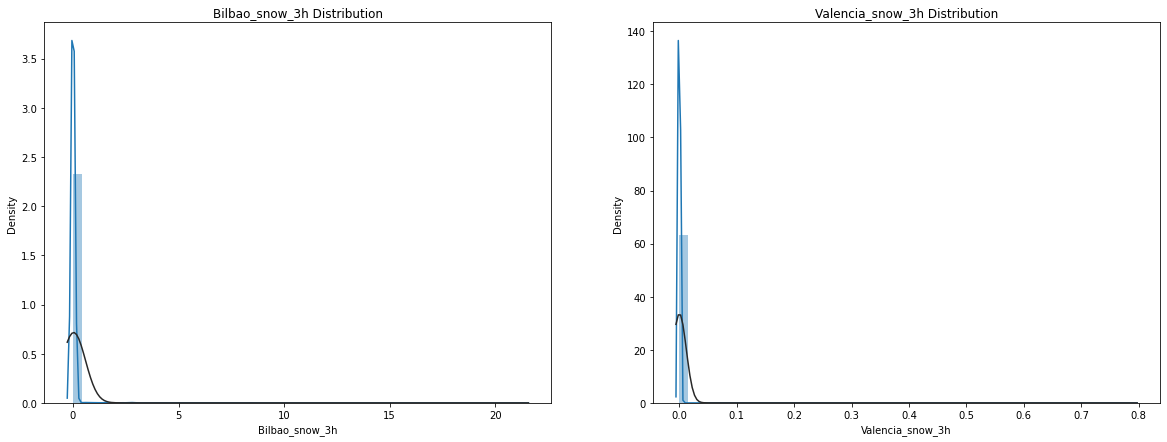

In [14]:
dist('snow_3h')

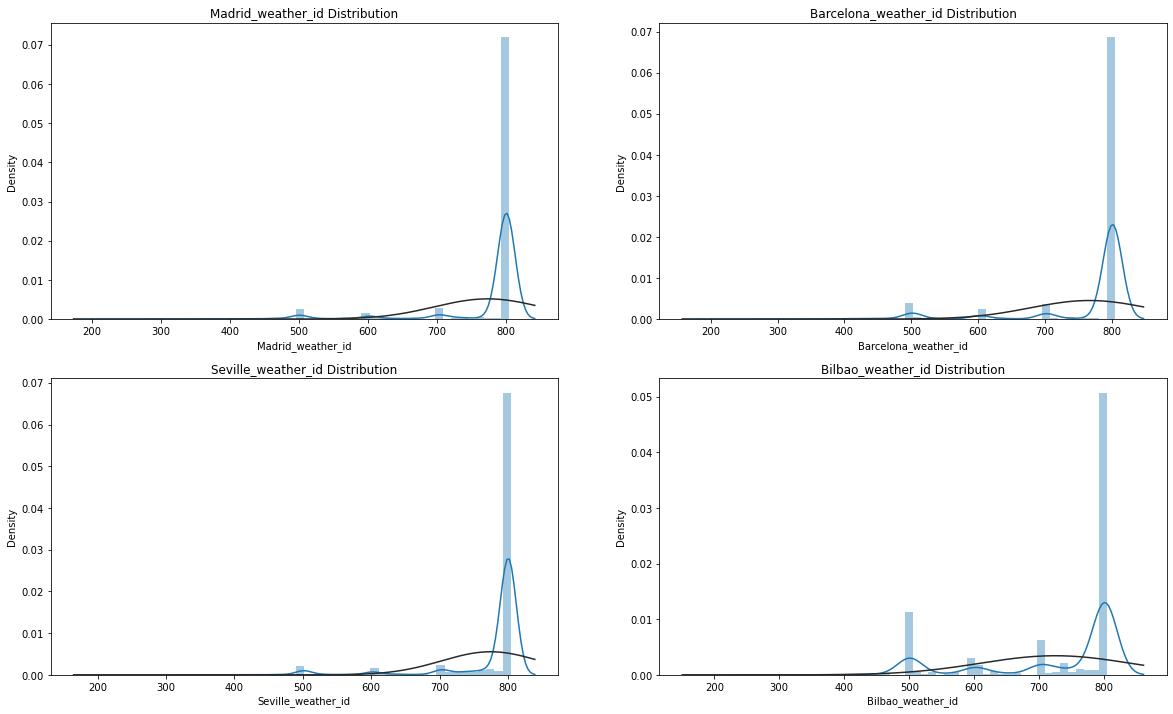

In [15]:
dist('_weather_id', capture=True)

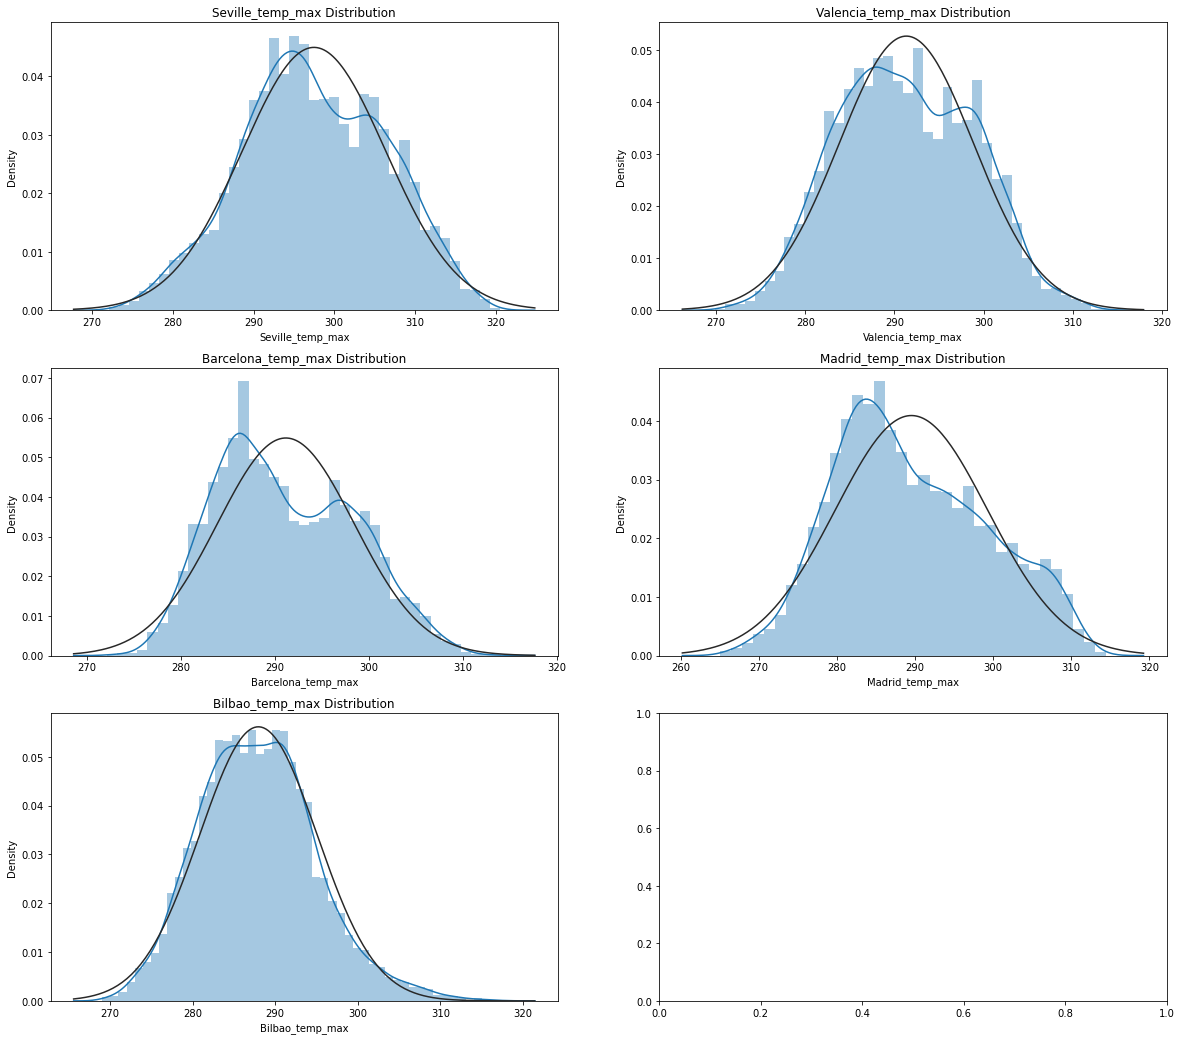

In [16]:
dist('temp_max')

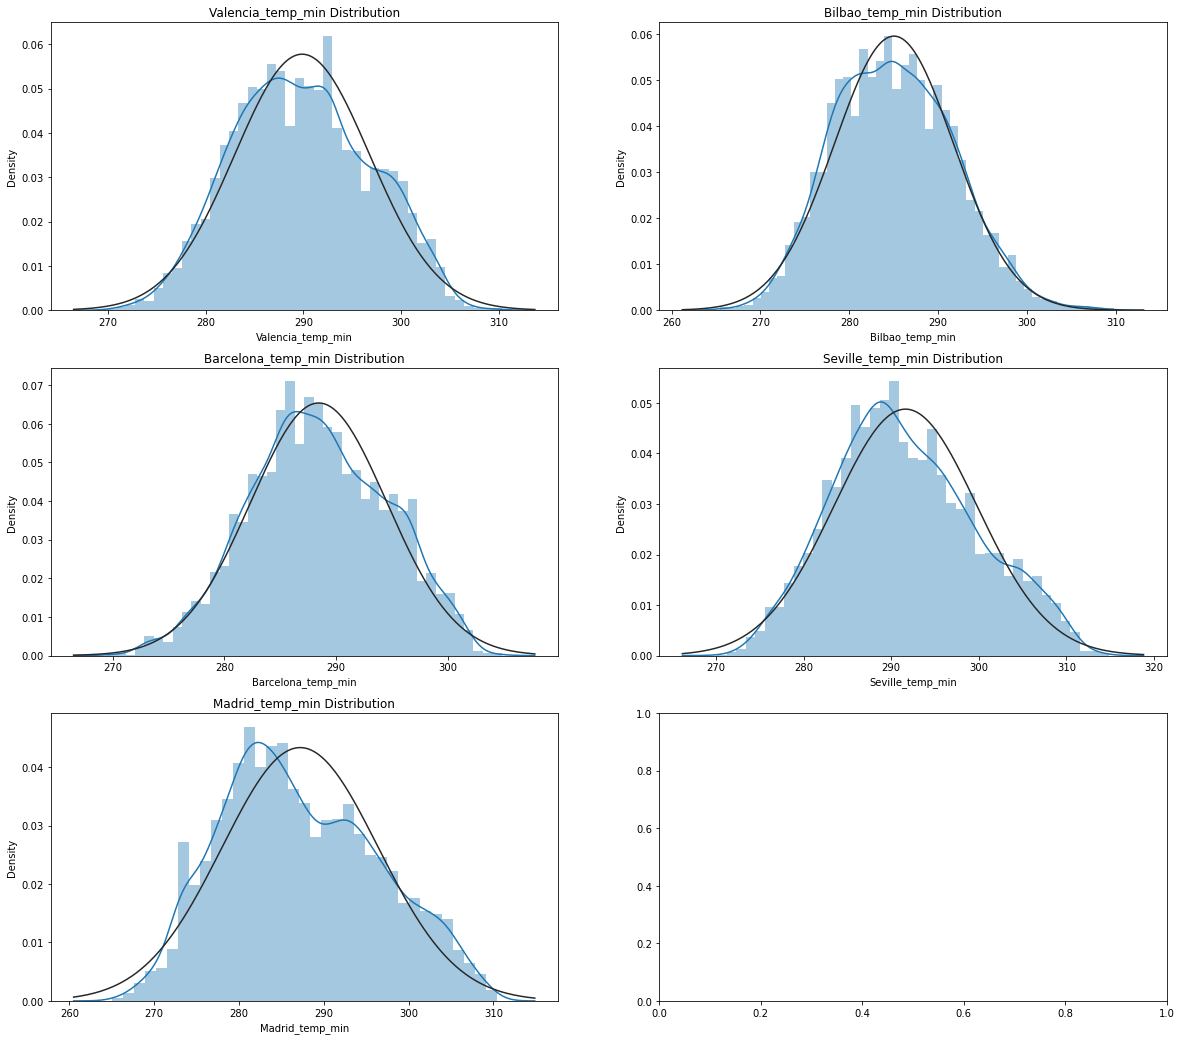

In [17]:
dist('temp_min')

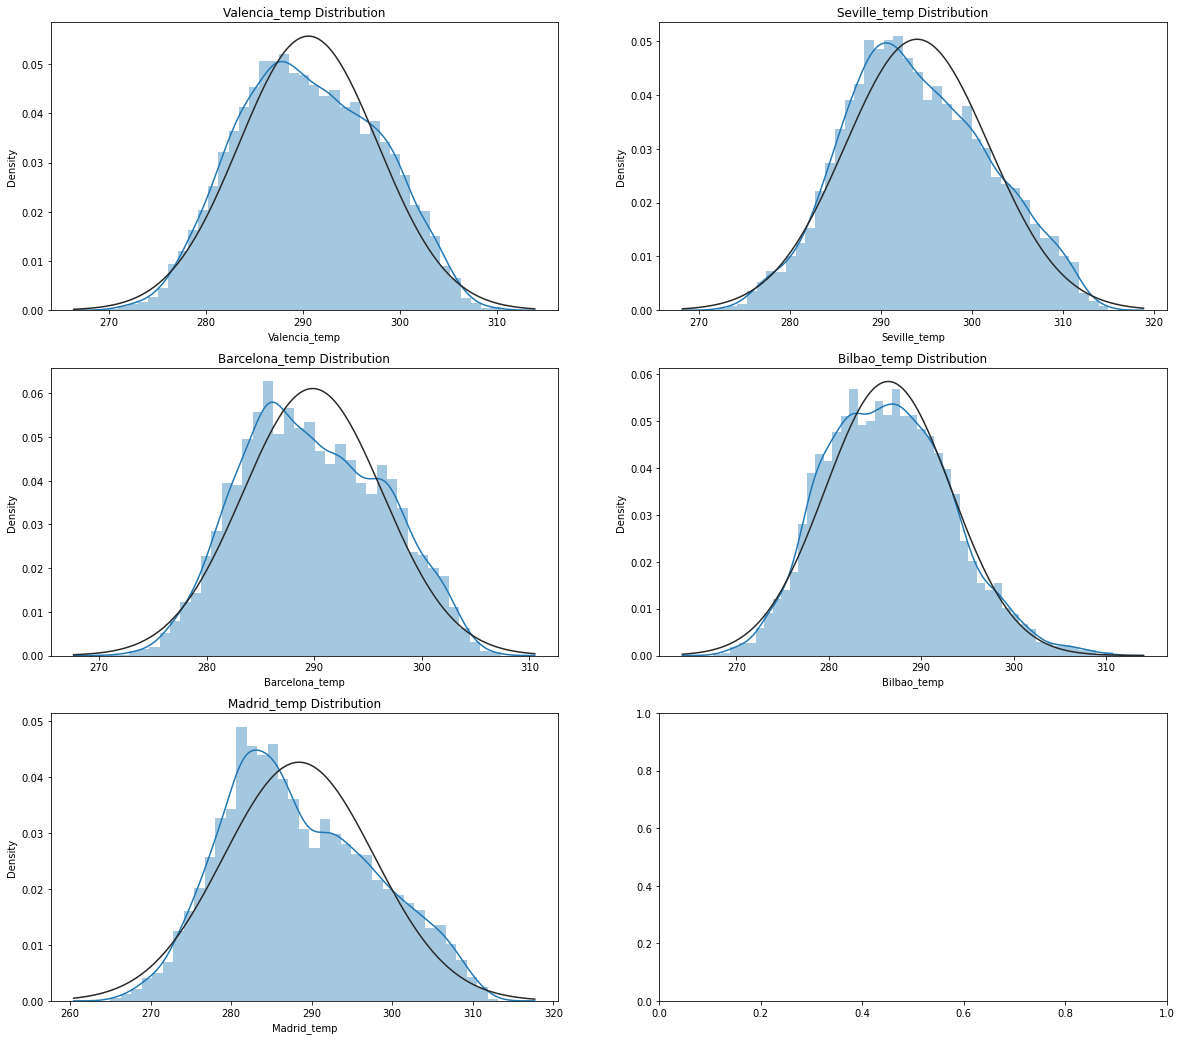

In [18]:
dist('_temp')

- It can be said of the cities that they all are under the same climate only that there are a few subtle differences in their weather patterns. This is because the shape of distribution of each weather condition is roughly the same for every city where the data is available. However, not all of them follow a normal distribution. 
- Relative to all other weather conditions, the data regarding temperature follows a normal distribution which points out the fact that it there is constant change in temperature from time to time within the cities of spain.
- For those that do not follow a normal distribution it is necessary to standardize them so correct statistical comparative analysis can be made by the regression model to be used.

In [19]:
def scatter(keyword, fit=False):
    features = [col for col in df_train.columns if col.endswith(keyword)]
    if len(features) == 5:
        fig = plt.figure(figsize=(20,12))
        axs = fig.subplots(3,2)
    elif 2 < len(features) < 5:
        fig = plt.figure(figsize=(20,12))
        axs = fig.subplots(2,2)
    else:
        fig = plt.figure(figsize=(20,9))
        axs = fig.subplots(1,2)
    for ax, column in zip(axs.ravel(), features):
        ax.scatter(df_train[column],df_train['load_shortfall_3h'])
        ax.title.set_text('{} Vs Load shortfall (3Hrs)'.format(column))
        ax.set_xlabel('{}'.format(column))
    if fit == True:
        fig.tight_layout(pad=3.0)
    plt.show()

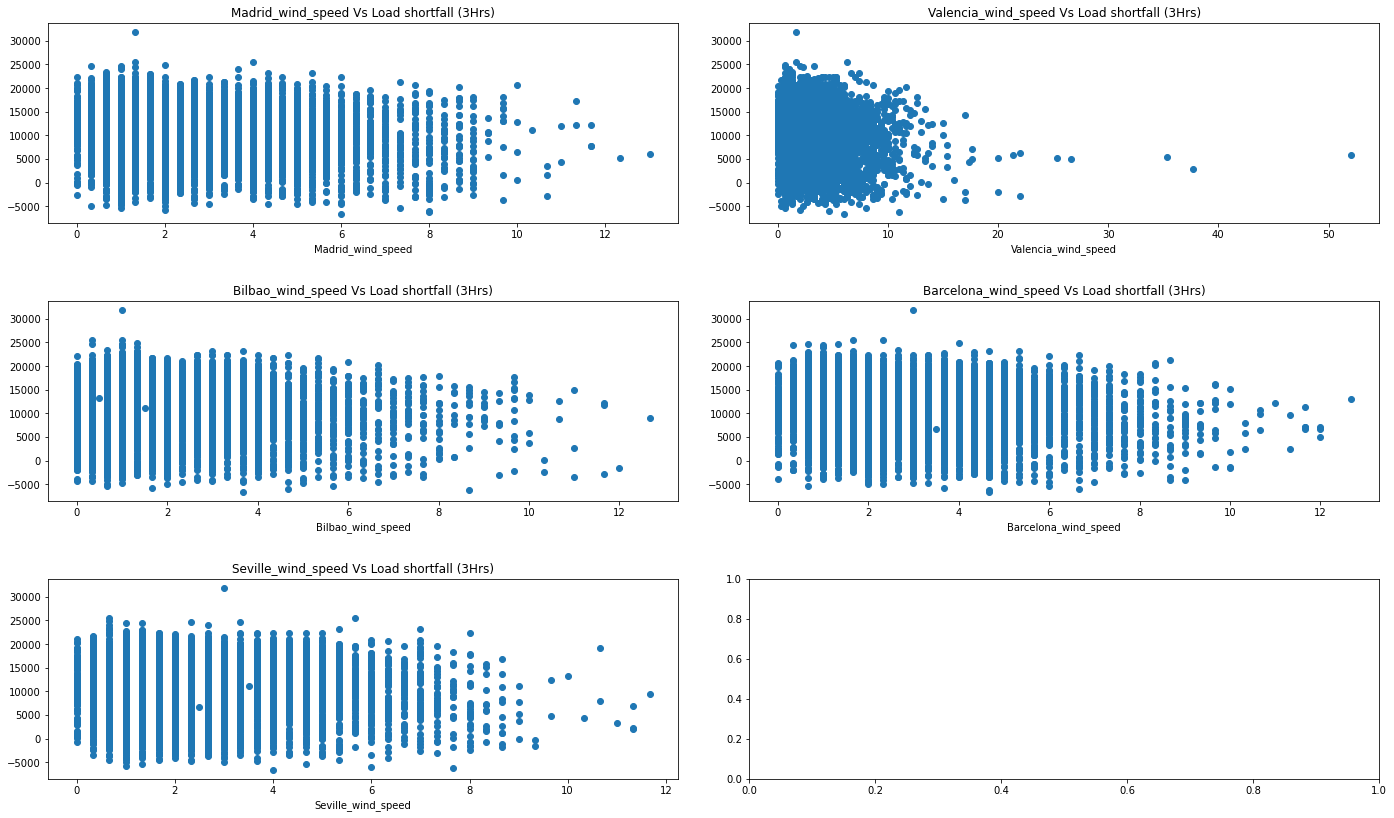

In [20]:
scatter('wind_speed', fit=True)

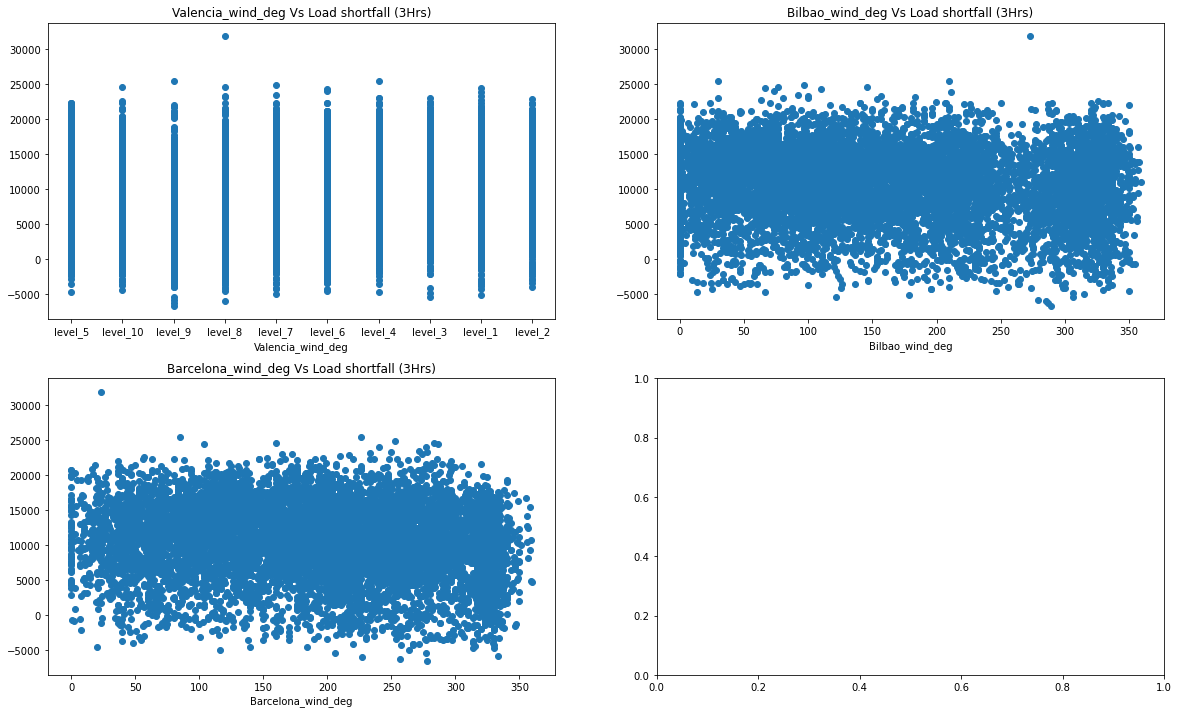

In [21]:
scatter('_wind_deg')


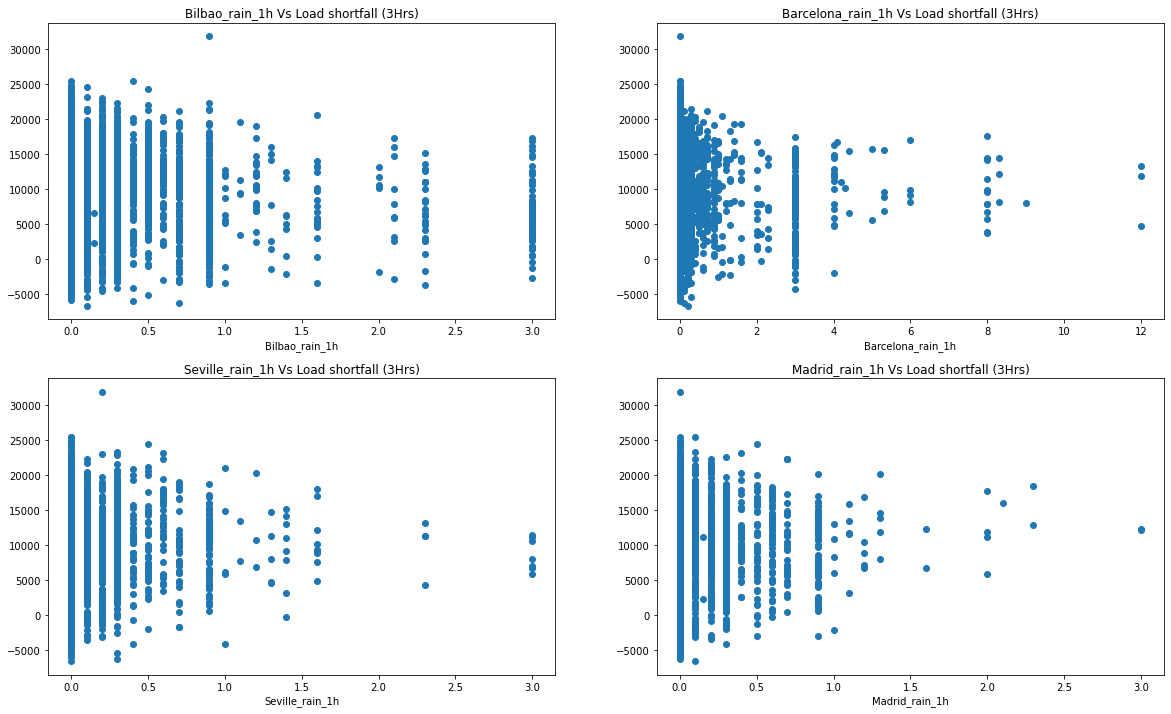

In [22]:
scatter('_rain_1h')

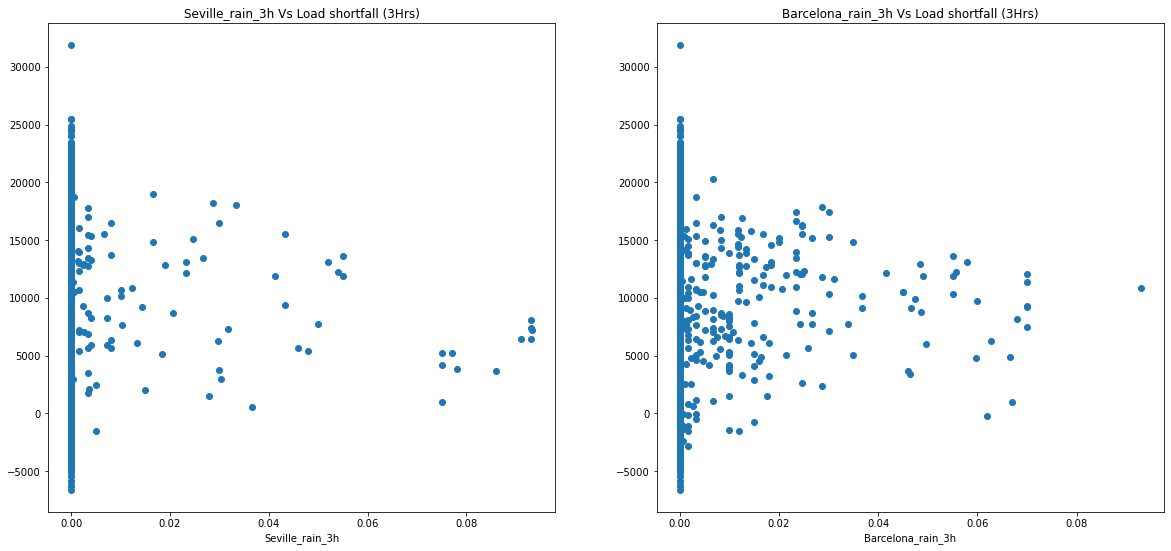

In [23]:
scatter('_rain_3h')

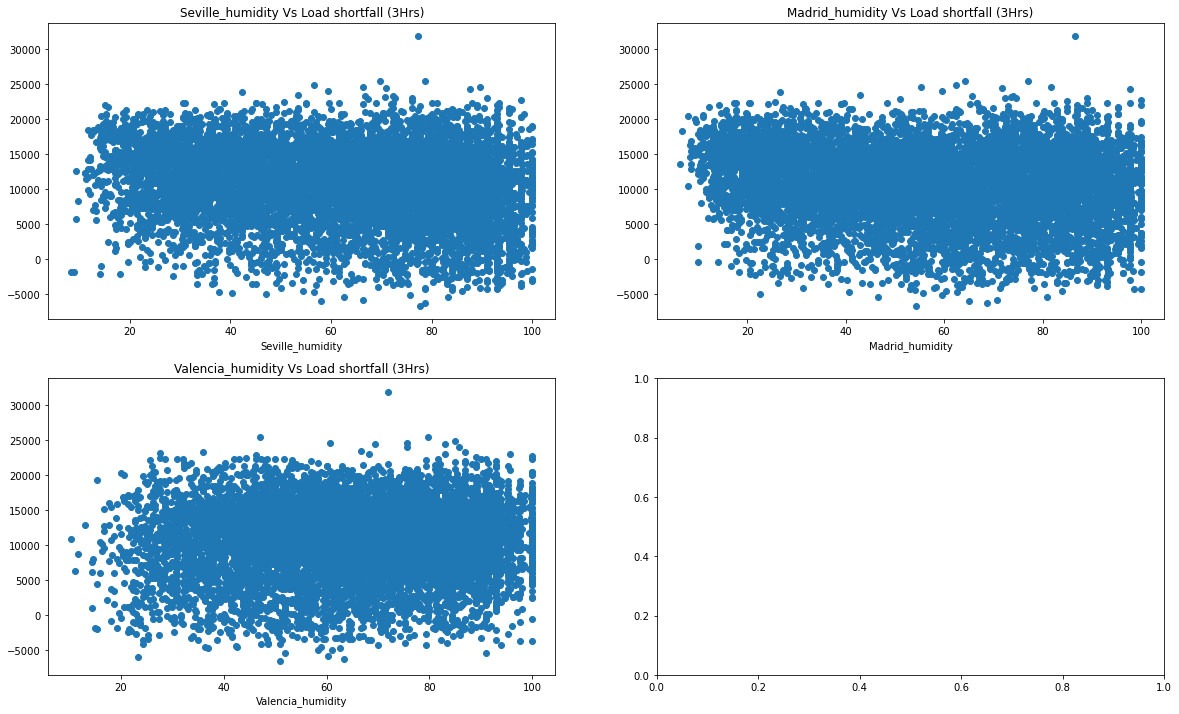

In [24]:
scatter('_humidity')

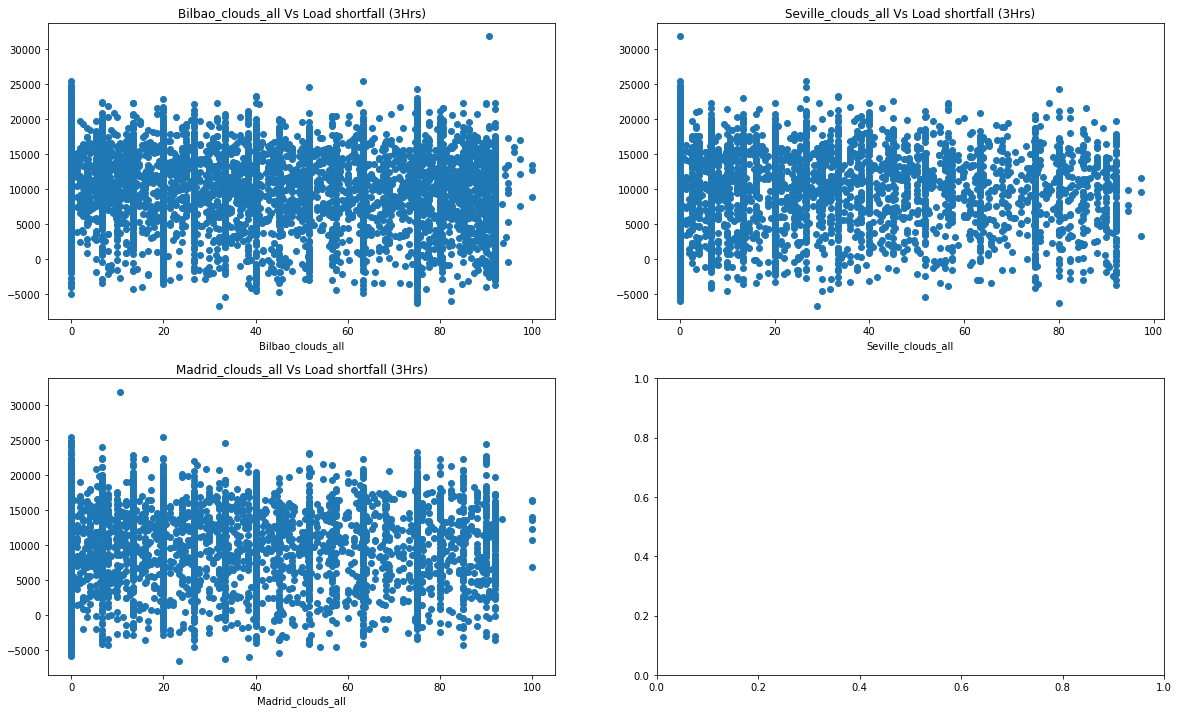

In [25]:
scatter('_clouds_all')

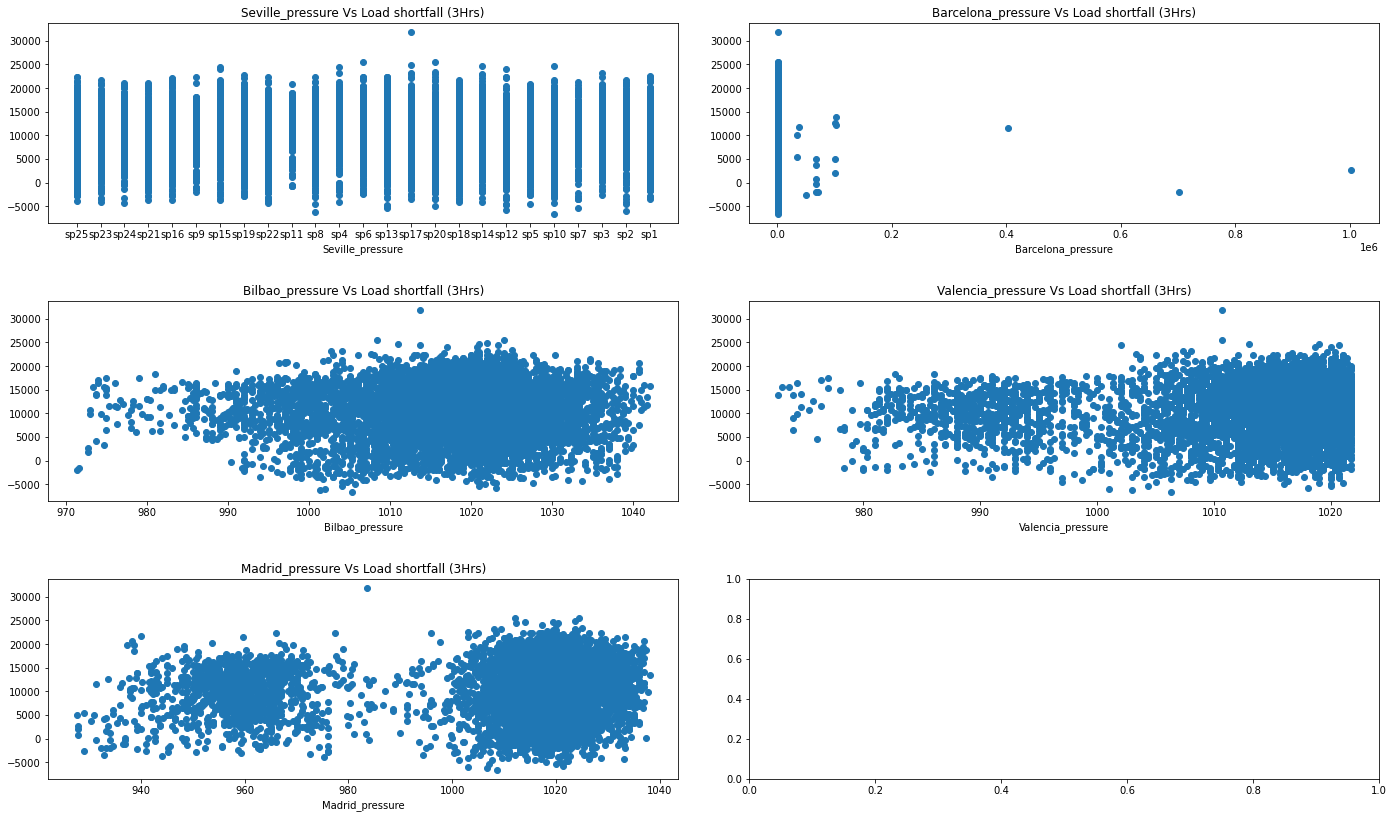

In [26]:
scatter('_pressure', True)

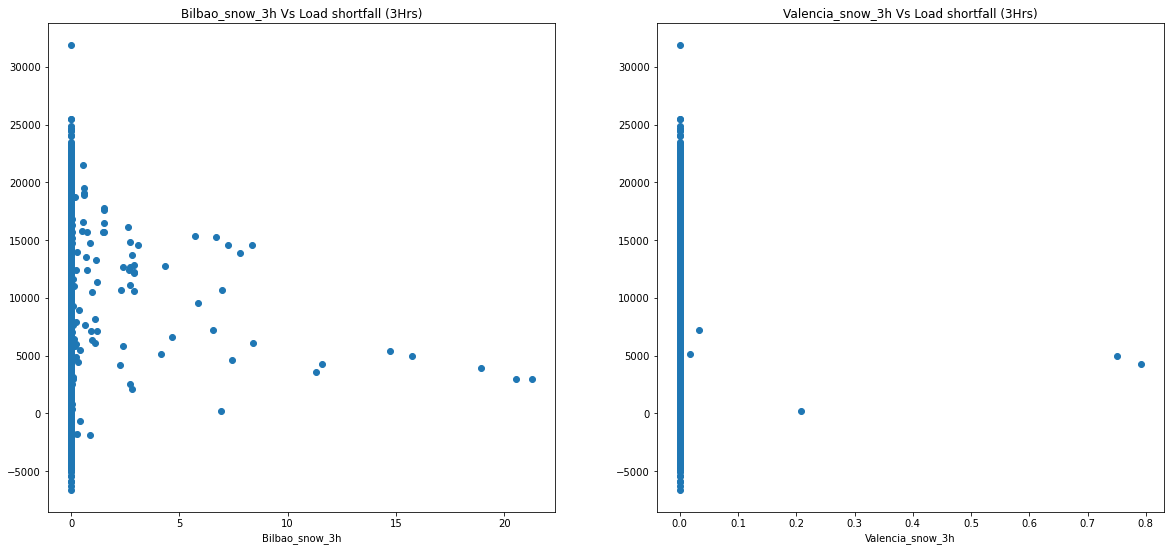

In [27]:
scatter('_snow_3h')

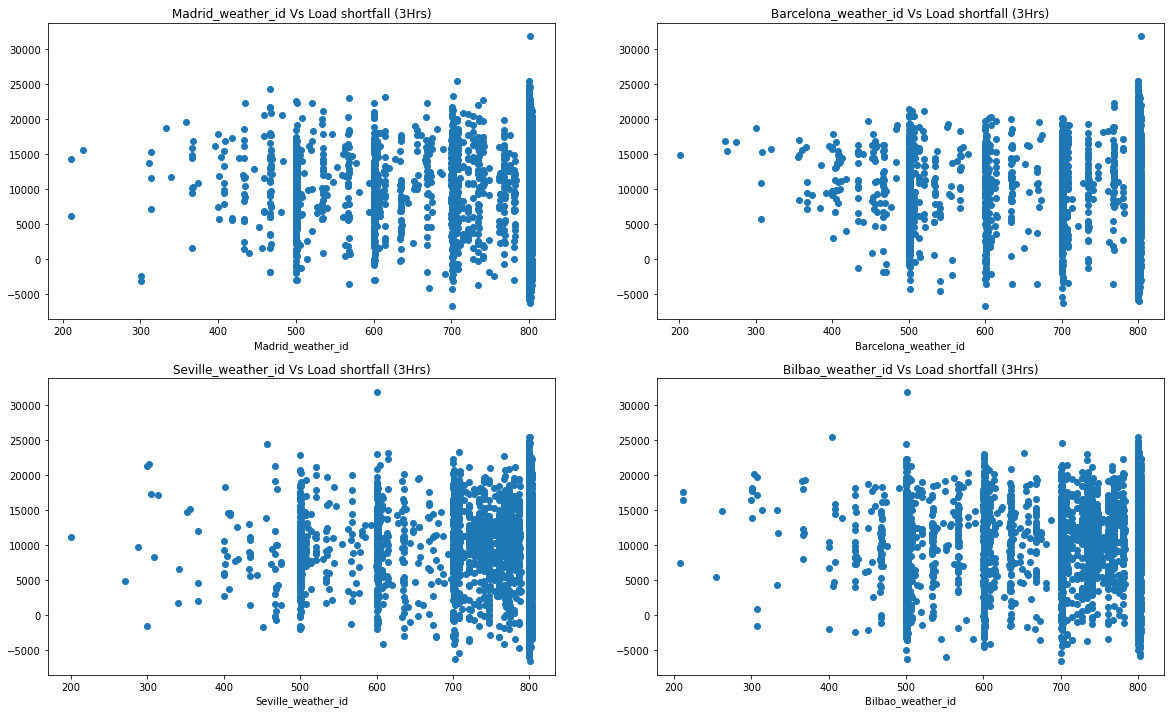

In [28]:
scatter('_weather_id')

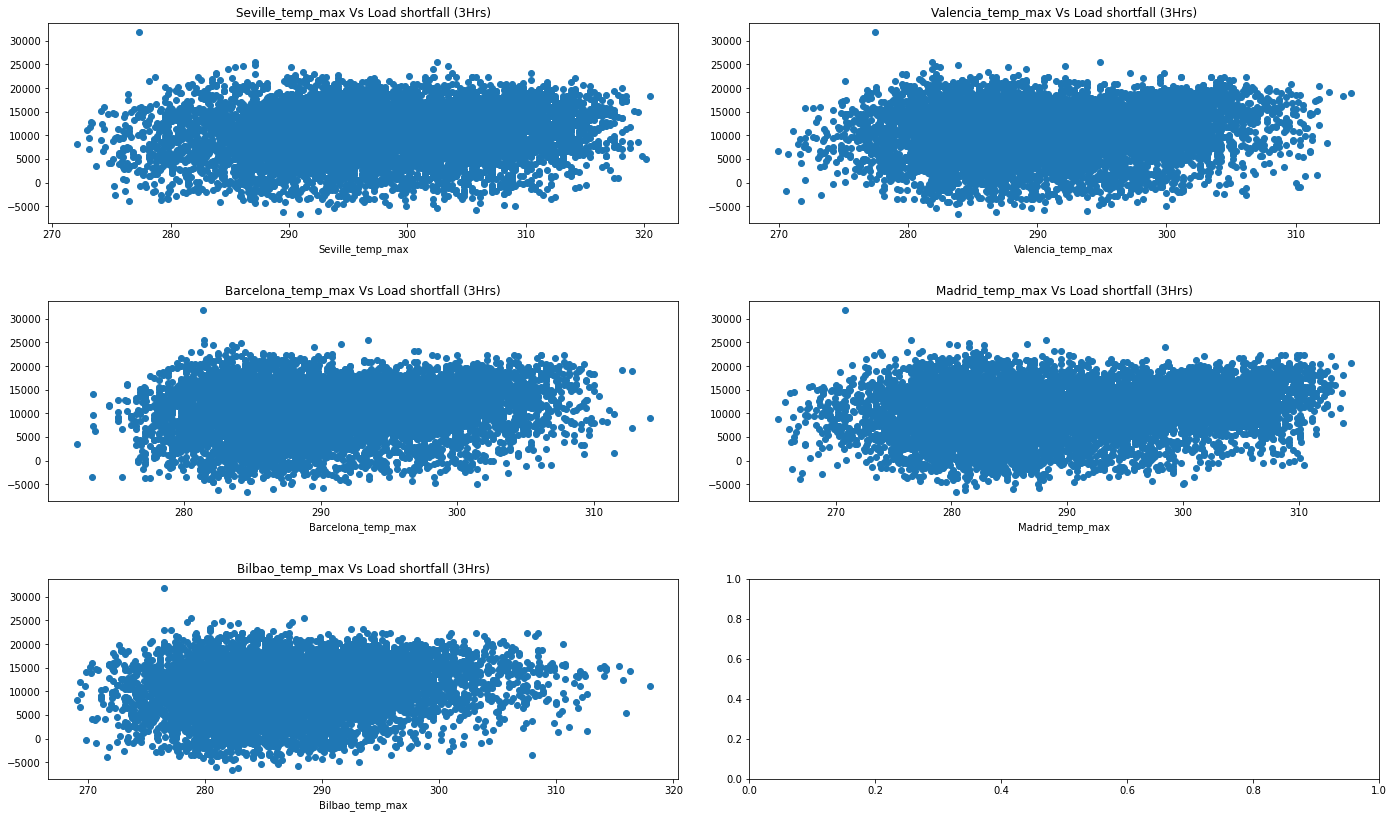

In [29]:
scatter('_temp_max', True)

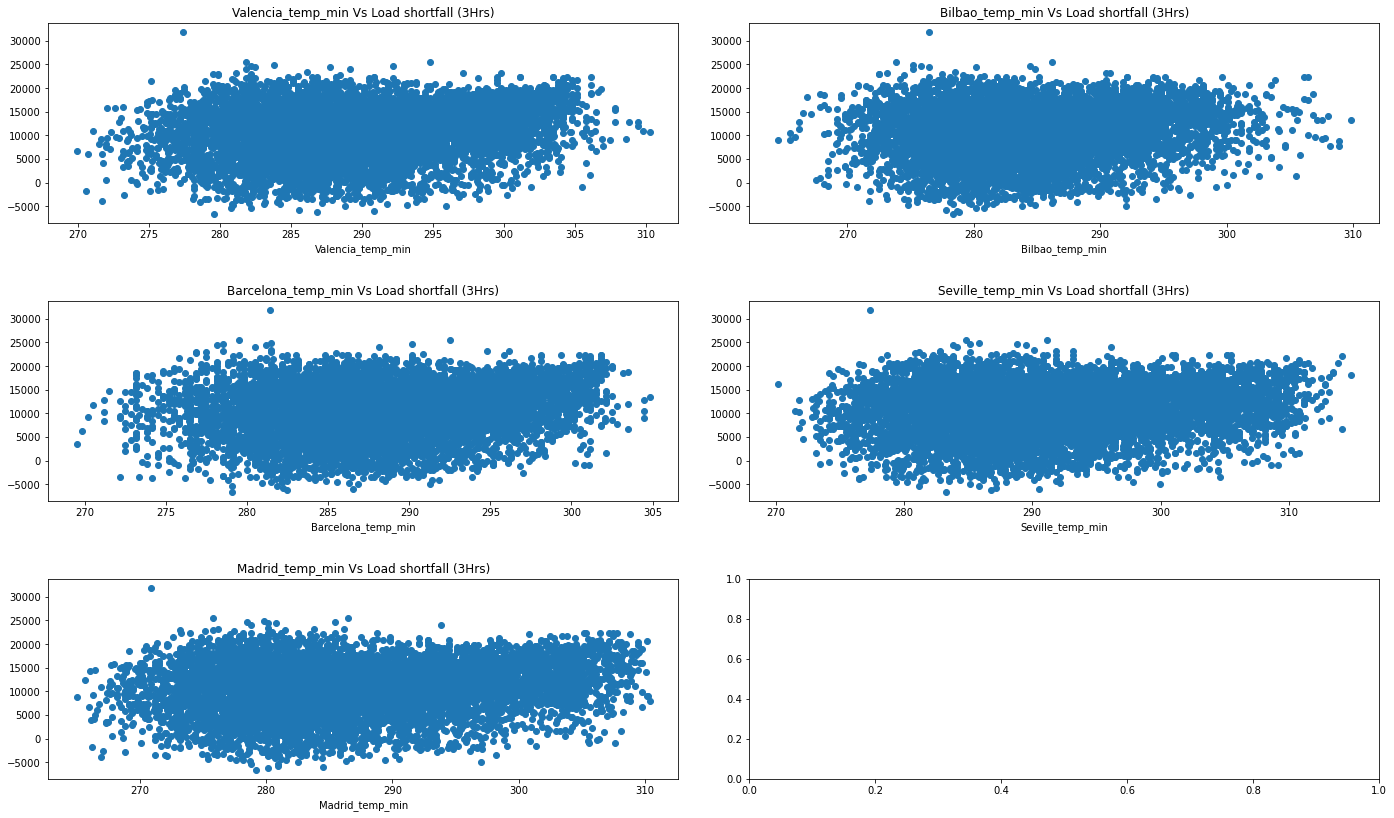

In [30]:
scatter('_temp_min', True)

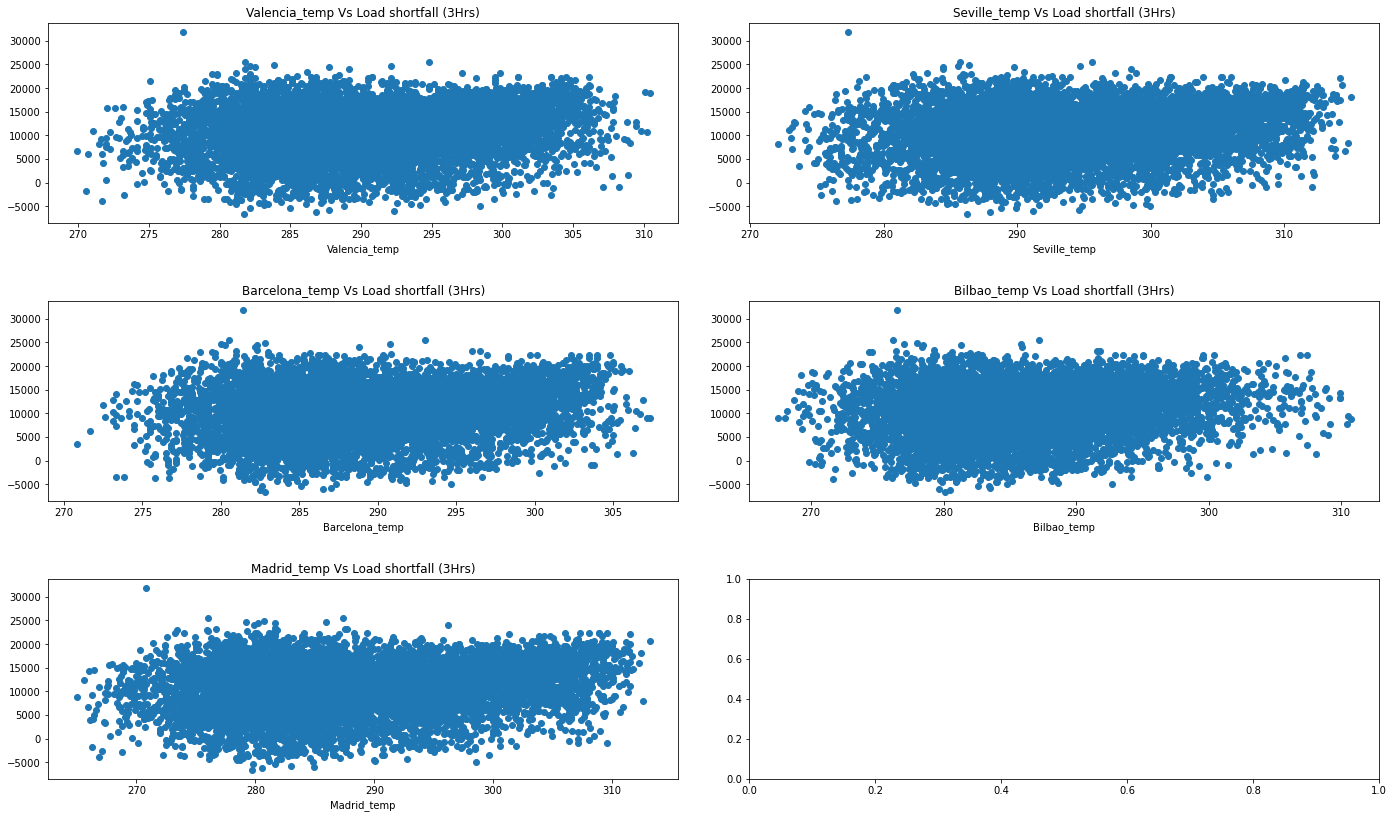

In [31]:
scatter('_temp', True)

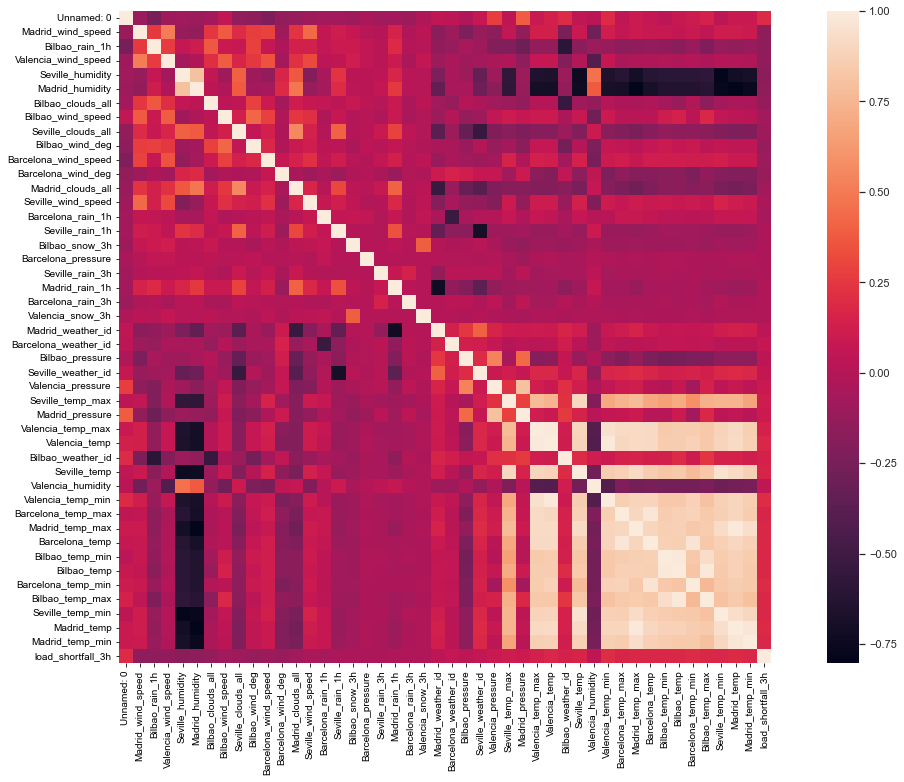

In [32]:
# evaluate correlation
correlation = df_train.corr()
fig = plt.figure(figsize=(20,12)).add_subplot(111)
sns.set_theme()
sns.heatmap(correlation, square=True)
plt.show()
#plt.savefig('scatter.png')

- It appears that all features relating to temperature `('Seville_temp_max', 'Valencia_temp_max', 'Valencia_temp', 'Seville_temp', 'Valencia_temp_min', 'Barcelona_temp_max', 'Madrid_temp_max', 'Barcelona_temp', 'Bilbao_temp_min', 'Bilbao_temp', 'Barcelona_temp_min', 'Bilbao_temp_max', 'Seville_temp_min', 'Madrid_temp', 'Madrid_temp_min')` are strongly correlated which can introduce multicolinearity.
- `Seville_humidity` and `Madrid_humidity` are also strongly correlated with these temperature columns
The following columns are as well strongly correlated
- `Madrid_rain_1h` and `Madrid_weather_id`
- `Seville_rain_1h` and `Seville weather_id`
- `Barcelona_rain_ih` and `Barcelona_weather`
- `Madrid_clouds_all` and `Madrid_weather_id`
- `Seville_clouds_all` and `Seville_weather_id`
- `Bilbao_clouds_all` and `Bilbao_weather_id`
- `Bilbao_rain_1h` and `Bilbao_weather_id`

A correlation matrix will confirm this

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

In [33]:
# remove missing values/ features
df = pd.concat([df_train, df_test])#combining train and test set so clean can be don on both at once

In [34]:
df.isnull().sum() #checking for columns with null values

Unnamed: 0                 0
time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2522
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather

In [35]:
'''
    as seen above the column "Valencia_pressure" has 
    2522 missing values and is to be removed
'''
df_clean = df #creating a new separate dataset to make changes on 
df_clean = df_clean.drop('Valencia_pressure', axis=1) 

In [36]:
df_clean.isnull().sum()#confirming removal of column

Unnamed: 0                 0
time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather_id          0
Seville_temp  

In [37]:
# create new features
df_clean.dtypes #checking datatypes of columns

Unnamed: 0                int64
time                     object
Madrid_wind_speed       float64
Valencia_wind_deg        object
Bilbao_rain_1h          float64
Valencia_wind_speed     float64
Seville_humidity        float64
Madrid_humidity         float64
Bilbao_clouds_all       float64
Bilbao_wind_speed       float64
Seville_clouds_all      float64
Bilbao_wind_deg         float64
Barcelona_wind_speed    float64
Barcelona_wind_deg      float64
Madrid_clouds_all       float64
Seville_wind_speed      float64
Barcelona_rain_1h       float64
Seville_pressure         object
Seville_rain_1h         float64
Bilbao_snow_3h          float64
Barcelona_pressure      float64
Seville_rain_3h         float64
Madrid_rain_1h          float64
Barcelona_rain_3h       float64
Valencia_snow_3h        float64
Madrid_weather_id       float64
Barcelona_weather_id    float64
Bilbao_pressure         float64
Seville_weather_id      float64
Seville_temp_max        float64
Madrid_pressure         float64
Valencia

In [38]:
'''
    "Time" seems to be a potential predictor but is not of the right datatype
    fit for the regression analysis. 
    Task is to convert it to datetime object and create new features containing
    day, month and year in numeric form
'''
    
df_clean['time'] = pd.to_datetime(df_clean['time'])#converting to datetime object

In [39]:
df_clean.dtypes 

Unnamed: 0                       int64
time                    datetime64[ns]
Madrid_wind_speed              float64
Valencia_wind_deg               object
Bilbao_rain_1h                 float64
Valencia_wind_speed            float64
Seville_humidity               float64
Madrid_humidity                float64
Bilbao_clouds_all              float64
Bilbao_wind_speed              float64
Seville_clouds_all             float64
Bilbao_wind_deg                float64
Barcelona_wind_speed           float64
Barcelona_wind_deg             float64
Madrid_clouds_all              float64
Seville_wind_speed             float64
Barcelona_rain_1h              float64
Seville_pressure                object
Seville_rain_1h                float64
Bilbao_snow_3h                 float64
Barcelona_pressure             float64
Seville_rain_3h                float64
Madrid_rain_1h                 float64
Barcelona_rain_3h              float64
Valencia_snow_3h               float64
Madrid_weather_id        

In [40]:
df_clean['time']#confirming

0      2015-01-01 03:00:00
1      2015-01-01 06:00:00
2      2015-01-01 09:00:00
3      2015-01-01 12:00:00
4      2015-01-01 15:00:00
               ...        
2915   2018-12-31 09:00:00
2916   2018-12-31 12:00:00
2917   2018-12-31 15:00:00
2918   2018-12-31 18:00:00
2919   2018-12-31 21:00:00
Name: time, Length: 11683, dtype: datetime64[ns]

In [41]:
df_clean['year'] = df_clean['time'].dt.year.astype(int)#creating year column
df_clean['month'] = df_clean['time'].dt.month.astype(int)#creating month column
df_clean['day'] = df_clean['time'].dt.day.astype(int)#creating day column
df_clean['hour'] = df_clean['time'].dt.hour.astype(int)#creating hour column

df_clean.head()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h,year,month,day,hour
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,...,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667,2015,1,1,3
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,...,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667,2015,1,1,6
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,...,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667,2015,1,1,9
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,...,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667,2015,1,1,12
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,...,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667,2015,1,1,15


In [42]:
# engineer existing features
'''
    "Seville_pressure" and "Valencia_wind_deg" exist as objects which should be changed to numeric values 
     to allow for regression analysis
'''

df_clean['Seville_pressure']

0       sp25
1       sp25
2       sp25
3       sp25
4       sp25
        ... 
2915    sp24
2916    sp24
2917    sp23
2918    sp23
2919    sp23
Name: Seville_pressure, Length: 11683, dtype: object

In [43]:
df_clean['Seville_pressure'].value_counts()#checking count of all unique values

sp10    673
sp13    668
sp8     629
sp6     619
sp4     555
sp5     537
sp12    523
sp1     503
sp21    495
sp22    493
sp3     477
sp16    476
sp17    473
sp18    472
sp2     467
sp24    464
sp19    442
sp25    441
sp15    426
sp20    425
sp23    424
sp14    318
sp9     259
sp7     235
sp11    189
Name: Seville_pressure, dtype: int64

In [44]:
'''
    There are 25 unique values in the "Seville_pressure" column. Transforming this column to dummies
    make the dataframe too cumbersome. Since there are figures which sort of rank the pressures
    from lowest to highest, the best option is to extract the these numbers
'''

df_clean['Seville_pressure'] = df_clean['Seville_pressure'].str.extract('(\d+)', expand=False)

In [45]:
df_clean['Seville_pressure'].value_counts() #confirming

10    673
13    668
8     629
6     619
4     555
5     537
12    523
1     503
21    495
22    493
3     477
16    476
17    473
18    472
2     467
24    464
19    442
25    441
15    426
20    425
23    424
14    318
9     259
7     235
11    189
Name: Seville_pressure, dtype: int64

In [46]:
df_clean['Valencia_wind_deg'].value_counts() #checking count of all unique values

level_8     1212
level_1     1212
level_7     1201
level_6     1184
level_4     1177
level_5     1175
level_10    1167
level_3     1167
level_2     1126
level_9     1062
Name: Valencia_wind_deg, dtype: int64

In [47]:
'''
    Similar to "Seville_pressure", the best option here too is to extract the numbers
'''

df_clean['Valencia_wind_deg'] = df_clean['Valencia_wind_deg'].str.extract('(\d+)', expand=False)
df_clean['Valencia_wind_deg'].value_counts()

8     1212
1     1212
7     1201
6     1184
4     1177
5     1175
10    1167
3     1167
2     1126
9     1062
Name: Valencia_wind_deg, dtype: int64

In [48]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11683 entries, 0 to 2919
Data columns (total 52 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Unnamed: 0            11683 non-null  int64         
 1   time                  11683 non-null  datetime64[ns]
 2   Madrid_wind_speed     11683 non-null  float64       
 3   Valencia_wind_deg     11683 non-null  object        
 4   Bilbao_rain_1h        11683 non-null  float64       
 5   Valencia_wind_speed   11683 non-null  float64       
 6   Seville_humidity      11683 non-null  float64       
 7   Madrid_humidity       11683 non-null  float64       
 8   Bilbao_clouds_all     11683 non-null  float64       
 9   Bilbao_wind_speed     11683 non-null  float64       
 10  Seville_clouds_all    11683 non-null  float64       
 11  Bilbao_wind_deg       11683 non-null  float64       
 12  Barcelona_wind_speed  11683 non-null  float64       
 13  Barcelona_wind_de

In [49]:
'''
    "Seville_pressure" and "Valencia_wind_deg" are still objects
'''
#tranforming to integers
df_clean['Seville_pressure'] = df_clean['Seville_pressure'].astype(int)
df_clean['Valencia_wind_deg'] = df_clean['Valencia_wind_deg'].astype(int)
df_clean.dtypes

Unnamed: 0                       int64
time                    datetime64[ns]
Madrid_wind_speed              float64
Valencia_wind_deg                int32
Bilbao_rain_1h                 float64
Valencia_wind_speed            float64
Seville_humidity               float64
Madrid_humidity                float64
Bilbao_clouds_all              float64
Bilbao_wind_speed              float64
Seville_clouds_all             float64
Bilbao_wind_deg                float64
Barcelona_wind_speed           float64
Barcelona_wind_deg             float64
Madrid_clouds_all              float64
Seville_wind_speed             float64
Barcelona_rain_1h              float64
Seville_pressure                 int32
Seville_rain_1h                float64
Bilbao_snow_3h                 float64
Barcelona_pressure             float64
Seville_rain_3h                float64
Madrid_rain_1h                 float64
Barcelona_rain_3h              float64
Valencia_snow_3h               float64
Madrid_weather_id        

In [50]:
#creating a new column called season that contains seasons corresponding to the months of the year in time column
month_day = df_clean['time'].dt.strftime('%m' '%d')

conditions = [
    (month_day >= '0301') & (month_day <= '0531'),
    (month_day >= '0601') & (month_day <= '0831'),
    (month_day >= '0901') & (month_day <= '1130'),
    ((month_day >= '1201') & (month_day <= '1231')) | ((month_day >= '0101') & (month_day <= '0229'))
    ]

# 0 = spring, 1 = summer, 2 = autumn, 3 = winter
season = [0, 1, 2, 3]

# creating a new column and using np.select to assign values to it using our lists as arguments
df_clean['Season'] = np.select(conditions, season)

In [51]:
#creating a new column called duration which tells what part of the day it is.
hour = df_clean['time'].dt.strftime('%H')

conditions = [
    (hour >= '06') & (hour <= '11'),
    (hour >= '12') & (hour <= '13'),
    (hour >= '14') & (hour <= '17'),
    (hour >= '18') & (hour <= '20'),
    ((hour >= '21') & (hour <= '24')) | ((hour >= '01') & (hour <= '05'))
    ]

# 0 = morning, 1 = noon, 2 = afternoon, 3 = evening, 4 = night
duration = [0, 1, 2, 3, 4]

# create a new column and use np.select to assign values to it using our lists as arguments
df_clean['Duration'] = np.select(conditions, duration)

In [52]:
#dropping the 'time' and 'Unnamed: 0' columns
df_clean = df_clean.drop(['time','Unnamed: 0'], axis=1)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11683 entries, 0 to 2919
Data columns (total 52 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Madrid_wind_speed     11683 non-null  float64
 1   Valencia_wind_deg     11683 non-null  int32  
 2   Bilbao_rain_1h        11683 non-null  float64
 3   Valencia_wind_speed   11683 non-null  float64
 4   Seville_humidity      11683 non-null  float64
 5   Madrid_humidity       11683 non-null  float64
 6   Bilbao_clouds_all     11683 non-null  float64
 7   Bilbao_wind_speed     11683 non-null  float64
 8   Seville_clouds_all    11683 non-null  float64
 9   Bilbao_wind_deg       11683 non-null  float64
 10  Barcelona_wind_speed  11683 non-null  float64
 11  Barcelona_wind_deg    11683 non-null  float64
 12  Madrid_clouds_all     11683 non-null  float64
 13  Seville_wind_speed    11683 non-null  float64
 14  Barcelona_rain_1h     11683 non-null  float64
 15  Seville_pressure    

In [53]:
df_clean.kurt()

Madrid_wind_speed          2.156333
Valencia_wind_deg         -1.205963
Bilbao_rain_1h            40.584429
Valencia_wind_speed       31.014311
Seville_humidity          -0.950169
Madrid_humidity           -1.151940
Bilbao_clouds_all         -1.519626
Bilbao_wind_speed          3.159652
Seville_clouds_all         1.950894
Bilbao_wind_deg           -1.064464
Barcelona_wind_speed       1.519692
Barcelona_wind_deg        -0.967252
Madrid_clouds_all         -0.076188
Seville_wind_speed         1.745508
Barcelona_rain_1h        130.956428
Seville_pressure          -1.234056
Seville_rain_1h           79.440881
Bilbao_snow_3h          1075.823322
Barcelona_pressure      4916.988101
Seville_rain_3h          552.067395
Madrid_rain_1h            63.372354
Barcelona_rain_3h        251.188884
Valencia_snow_3h        5452.830025
Madrid_weather_id          8.018543
Barcelona_weather_id       5.932283
Bilbao_pressure            1.847650
Seville_weather_id        10.402060
Seville_temp_max          -0

It appears some of the columns contains outliers as they have large kurtosis
Using logarithm to scale down the data will help reduce the impact of the outliers so the model can fit precisely and make good predictions

In [54]:
#since there are zeroes in the data, this code tends to shift the data upwards so the mininmum value is 1 and 
#hence allowing logarithmic functions be made
for column in df_clean.drop('load_shortfall_3h', axis=1).columns:
    if df_clean[column].kurt() > 5:
        if df_clean[column].min() == 0:
            df_clean[column] = df_clean[column] + 1
        df_clean[column] = np.log(df_clean[column])

In [55]:
df_clean.kurt()

Madrid_wind_speed          2.156333
Valencia_wind_deg         -1.205963
Bilbao_rain_1h            16.230189
Valencia_wind_speed       -0.283944
Seville_humidity          -0.950169
Madrid_humidity           -1.151940
Bilbao_clouds_all         -1.519626
Bilbao_wind_speed          3.159652
Seville_clouds_all         1.950894
Bilbao_wind_deg           -1.064464
Barcelona_wind_speed       1.519692
Barcelona_wind_deg        -0.967252
Madrid_clouds_all         -0.076188
Seville_wind_speed         1.745508
Barcelona_rain_1h         35.463747
Seville_pressure          -1.234056
Seville_rain_1h           33.539383
Bilbao_snow_3h           367.024534
Barcelona_pressure       771.004105
Seville_rain_3h          539.522086
Madrid_rain_1h            24.768346
Barcelona_rain_3h        244.234739
Valencia_snow_3h        5267.242331
Madrid_weather_id         12.843456
Barcelona_weather_id      10.049895
Bilbao_pressure            1.847650
Seville_weather_id        16.111976
Seville_temp_max          -0

Using logarithm has dealt with the outliers but only minimally. Other methods will be used further reduce the outliers in the data

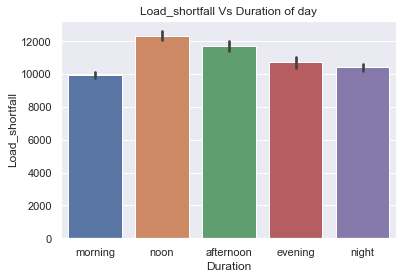

In [56]:
sns.set_theme()
sns.barplot(df_clean.Duration, df_clean.load_shortfall_3h)
plt.xticks(ticks=[0,1,2,3, 4], labels=['morning', 'noon', 'afternoon', 'evening', 'night'])
plt.title("Load_shortfall Vs Duration of day")
plt.xlabel("Duration")
plt.ylabel("Load_shortfall")
plt.show()

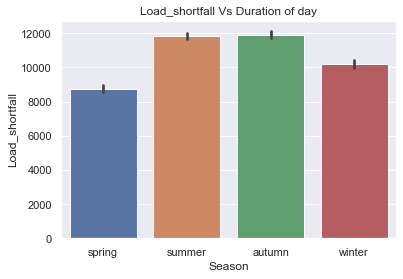

In [57]:
# 0 = spring, 1 = summer, 2 = autumn, 3 = winter
sns.set_theme()
sns.barplot(df_clean.Season, df_clean.load_shortfall_3h)
plt.xticks(ticks=[0,1,2,3], labels=['spring', 'summer', 'autumn', 'winter'])
plt.title("Load_shortfall Vs Duration of day")
plt.xlabel("Season")
plt.ylabel("Load_shortfall")
plt.show()

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

In [58]:
# split data
x = df_clean[:len(df_train)].drop('load_shortfall_3h', axis=1)
y = df_clean[:len(df_train)][['load_shortfall_3h']]
print('shape of orignal training dataset:', df_clean.shape)
print('shape of x:', x.shape)
print('shape of y:', y.shape)



shape of orignal training dataset: (11683, 52)
shape of x: (8763, 51)
shape of y: (8763, 1)


In [59]:
#standardizing features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

In [60]:
# create targets and features dataset
#splitting data into train and test
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=2)

In [61]:
# create one or more ML models
lm = LinearRegression()

In [62]:
lm.fit(x_train, y_train)

LinearRegression()

In [63]:
##########creating ridge model

In [64]:
ridge = Ridge()

In [65]:
ridge.fit(x_train, y_train)

Ridge()

In [66]:
#######using Lasso regressing model

In [67]:
#creating lasso regression object
lasso = Lasso(0.9)

In [68]:
lasso.fit(x_train, y_train)

Lasso(alpha=0.9)

In [69]:
###ensembling above models using StackingRegressor

#declaring base models to be used
models = [("LR",lm), ("RG",ridge), ("LAS",lasso)]

#declaring meta learner
meta_learner_reg = LinearRegression()

#instantiating model
stk_rg = StackingRegressor(estimators=models, final_estimator=meta_learner_reg)

#training model
stk_rg.fit(x_train, y_train)


StackingRegressor(estimators=[('LR', LinearRegression()), ('RG', Ridge()),
                              ('LAS', Lasso(alpha=0.9))],
                  final_estimator=LinearRegression())

In [70]:
#using RandomForest regression model

#instantiating the model with 50trees and max-depth of 15
RF_50_15 = RandomForestRegressor(max_depth=15, n_estimators=50, random_state=21)
#Training model
RF_50_15.fit(x_train, y_train)

RandomForestRegressor(max_depth=15, n_estimators=50, random_state=21)

In [71]:
#instantiating the model with 100trees and max-depth of 21
RF_100_21 = RandomForestRegressor(max_depth=21, n_estimators=100, random_state=21)#(first try was 21, 100)
#Training model
RF_100_21.fit(x_train, y_train)

RandomForestRegressor(max_depth=21, random_state=21)

In [72]:
# Calculate the mean squared error on the original test data
original_predictions = RF_100_21.predict(x_test)
original_mse = metrics.mean_squared_error(y_test, original_predictions)

# Calculate variable importance
variable_importance = []
for i in range(x_train.shape[1]):
    X_modified = x_test.copy()  # Create a copy of the test data
    np.random.shuffle(X_modified[:, i])  # Shuffle values of the i-th variable
    
    modified_predictions = RF_100_21.predict(X_modified)
    modified_mse = metrics.mean_squared_error(y_test, modified_predictions)
    
    # Calculate the percentage increase in MSE
    percentage_increase = ((modified_mse - original_mse) / original_mse) * 100
    variable_importance.append((i, percentage_increase))

# Sort the variable importance list in descending order
variable_importance.sort(key=lambda x: x[1], reverse=True)

# Print the variable importance
for var, importance in variable_importance:
    print(f"Variable {var} importance: {importance}% ---", x.columns[var])

Variable 47 importance: 132.4272750199411% --- day
Variable 48 importance: 90.36044887034991% --- hour
Variable 46 importance: 70.58845865181912% --- month
Variable 45 importance: 33.96514536217792% --- year
Variable 25 importance: 9.519123284951522% --- Bilbao_pressure
Variable 0 importance: 8.446026348817718% --- Madrid_wind_speed
Variable 18 importance: 8.002970464869348% --- Barcelona_pressure
Variable 33 importance: 4.257719401803484% --- Valencia_humidity
Variable 40 importance: 4.0680049597744405% --- Barcelona_temp_min
Variable 34 importance: 3.512059640973707% --- Valencia_temp_min
Variable 5 importance: 3.246722054893178% --- Madrid_humidity
Variable 7 importance: 3.153634016512562% --- Bilbao_wind_speed
Variable 15 importance: 2.8360736068325716% --- Seville_pressure
Variable 42 importance: 2.735821069270258% --- Seville_temp_min
Variable 3 importance: 2.5437840611090565% --- Valencia_wind_speed
Variable 28 importance: 2.4571118345612786% --- Madrid_pressure
Variable 1 impor

In [73]:
x_train_2 = pd.DataFrame(x_train.copy())
x_train_2.columns = x.columns
x_train_2 = x_train_2.drop(['Valencia_temp_max', 
                            'Bilbao_temp',
                            'Seville_temp',
                            'Barcelona_weather_id',
                            'Seville_rain_3h',
                            'Bilbao_weather_id',
                            'Seville_clouds_all',
                            'Madrid_temp',
                            'Season',
                            'Madrid_weather_id',
                            'Madrid_clouds_all',
                            'Barcelona_rain_1h',
                            'Bilbao_rain_1h',
                            'Valencia_temp',
                            'Duration',
                            'Bilbao_snow_3h',
                            'Madrid_rain_1h',
                            'Seville_rain_1h',
                            'Barcelona_rain_3h',
                            'Valencia_snow_3h',
                            'Seville_weather_id'
                            ], axis=1)

In [74]:
x_test_2 = pd.DataFrame(x_test.copy())
x_test_2.columns = x.columns
x_test_2 = x_test_2.drop(['Valencia_temp_max', 
                            'Bilbao_temp',
                            'Seville_temp',
                            'Barcelona_weather_id',
                            'Seville_rain_3h',
                            'Bilbao_weather_id',
                            'Seville_clouds_all',
                            'Madrid_temp',
                            'Season',
                            'Madrid_weather_id',
                            'Madrid_clouds_all',
                            'Barcelona_rain_1h',
                            'Bilbao_rain_1h',
                            'Valencia_temp',
                            'Duration',
                            'Bilbao_snow_3h',
                            'Madrid_rain_1h',
                            'Seville_rain_1h',
                            'Barcelona_rain_3h',
                            'Valencia_snow_3h',
                            'Seville_weather_id'
                            ], axis=1)

In [75]:
#instantiating another model with 50trees and max-depth of 15
RF_50_15_2 = RandomForestRegressor(max_depth=15, n_estimators=50, random_state=21)
#Training model
RF_50_15_2.fit(x_train_2, y_train)

RandomForestRegressor(max_depth=15, n_estimators=50, random_state=21)

In [76]:
#instantiating the model with 100trees and max-depth of 21
RF_100_21_2 = RandomForestRegressor(max_depth=21, n_estimators=100, random_state=21)
#Training model
RF_100_21_2.fit(x_train_2, y_train)

RandomForestRegressor(max_depth=21, random_state=21)

In [77]:
#instantiating random forest model
d_tree = DecisionTreeRegressor(max_depth=7, random_state=20) 

#instantiating AdaBoostRegressor with random forest as base model
boost_m7 = AdaBoostRegressor(base_estimator = d_tree)

boost_m7.fit(x_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=7,
                                                       random_state=20))

In [78]:
#instantiating random forest model
d_tree_2= DecisionTreeRegressor(max_depth=15, random_state=20) 

#instantiating AdaBoostRegressor with random forest as base model
boost_m15 = AdaBoostRegressor(base_estimator = d_tree_2)

boost_m15.fit(x_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=15,
                                                       random_state=20))

In [79]:
#instantiating random forest model
d_tree_3 = DecisionTreeRegressor(max_depth=7, random_state=20)

#instantiating AdaBoostRegressor with random forest as base model
boost_m7_2 = AdaBoostRegressor(base_estimator = d_tree_3)

boost_m7_2.fit(x_train_2, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=7,
                                                       random_state=20))

In [80]:
#instantiating random forest model
d_tree_4 = DecisionTreeRegressor(max_depth=15, random_state=20)

#instantiating AdaBoostRegressor with random forest as base model
boost_m15_2 = AdaBoostRegressor(base_estimator = d_tree_4)

boost_m15_2.fit(x_train_2, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=15,
                                                       random_state=20))

In [81]:
# evaluate one or more ML models


<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [82]:
# Compare model performance
#checking the training accuracy 
#creating function to perform accuracy checks
def accu(X, y, models, training=True, r2=False):
    for model in models:
        predictions = model.predict(X)
        if training == True:
            print('Training MSE and RMSE')
            print('{}:'.format(model), metrics.mean_squared_error(y,predictions))
            print('{}:'.format(model), np.sqrt(metrics.mean_squared_error(y, predictions)))
            if r2 == True:
                print('Training R_squared')
                print('{}:'.format(model), metrics.r2_score(y,predictions))
        if training == False:
            print('Testing MSE and RMSE')
            print('{}:'.format(model), metrics.mean_squared_error(y,predictions))
            print('{}:'.format(model), np.sqrt(metrics.mean_squared_error(y, predictions)))
            if r2 == True:
                print('Testing R_squared')
                print('{}:'.format(model), metrics.r2_score(y,predictions))
    
    

In [83]:
accu(x_train, y_train, [lm, ridge, lasso, stk_rg, RF_100_21, RF_50_15, boost_m15, boost_m7], training=True, r2=True)

Training MSE and RMSE
LinearRegression(): 21934139.199814327
LinearRegression(): 4683.3897125708345
Training R_squared
LinearRegression(): 0.19689279251127667
Training MSE and RMSE
Ridge(): 21936770.398146465
Ridge(): 4683.670611619317
Training R_squared
Ridge(): 0.19679645253980016
Training MSE and RMSE
Lasso(alpha=0.9): 21950081.57090498
Lasso(alpha=0.9): 4685.091415426702
Training R_squared
Lasso(alpha=0.9): 0.19630907080646165
Training MSE and RMSE
StackingRegressor(estimators=[('LR', LinearRegression()), ('RG', Ridge()),
                              ('LAS', Lasso(alpha=0.9))],
                  final_estimator=LinearRegression()): 21943307.250281908
StackingRegressor(estimators=[('LR', LinearRegression()), ('RG', Ridge()),
                              ('LAS', Lasso(alpha=0.9))],
                  final_estimator=LinearRegression()): 4684.368393954718
Training R_squared
StackingRegressor(estimators=[('LR', LinearRegression()), ('RG', Ridge()),
                              ('LAS'

In [84]:
accu(x_train_2, y_train, [RF_100_21_2, RF_50_15_2, boost_m15_2, boost_m7_2], training=True, r2=True)

Training MSE and RMSE
RandomForestRegressor(max_depth=21, random_state=21): 1424419.7410875838
RandomForestRegressor(max_depth=21, random_state=21): 1193.4905701712032
Training R_squared
RandomForestRegressor(max_depth=21, random_state=21): 0.9478456049660547
Training MSE and RMSE
RandomForestRegressor(max_depth=15, n_estimators=50, random_state=21): 2285002.20129282
RandomForestRegressor(max_depth=15, n_estimators=50, random_state=21): 1511.6223739058707
Training R_squared
RandomForestRegressor(max_depth=15, n_estimators=50, random_state=21): 0.9163358215123666
Training MSE and RMSE
AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=15,
                                                       random_state=20)): 217246.57383409486
AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=15,
                                                       random_state=20)): 466.0971720940762
Training R_squared
AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=15

In [85]:
accu(x_test, y_test, [lm, ridge, lasso, stk_rg, RF_100_21, RF_50_15, boost_m15, boost_m7], training=False, r2=True)

Testing MSE and RMSE
LinearRegression(): 21364146.240708087
LinearRegression(): 4622.136545009038
Testing R_squared
LinearRegression(): 0.20498717235722919
Testing MSE and RMSE
Ridge(): 21358550.917437
Ridge(): 4621.531230819175
Testing R_squared
Ridge(): 0.20519538820284278
Testing MSE and RMSE
Lasso(alpha=0.9): 21362217.021939058
Lasso(alpha=0.9): 4621.927846898852
Testing R_squared
Lasso(alpha=0.9): 0.20505896336874097
Testing MSE and RMSE
StackingRegressor(estimators=[('LR', LinearRegression()), ('RG', Ridge()),
                              ('LAS', Lasso(alpha=0.9))],
                  final_estimator=LinearRegression()): 21391410.662848238
StackingRegressor(estimators=[('LR', LinearRegression()), ('RG', Ridge()),
                              ('LAS', Lasso(alpha=0.9))],
                  final_estimator=LinearRegression()): 4625.084935744233
Testing R_squared
StackingRegressor(estimators=[('LR', LinearRegression()), ('RG', Ridge()),
                              ('LAS', Lasso(alp

In [86]:
accu(x_test_2, y_test, [RF_100_21_2, RF_50_15_2, boost_m15_2, boost_m7_2], training=False, r2=True)

Testing MSE and RMSE
RandomForestRegressor(max_depth=21, random_state=21): 9473138.52529761
RandomForestRegressor(max_depth=21, random_state=21): 3077.84641028392
Testing R_squared
RandomForestRegressor(max_depth=21, random_state=21): 0.6474810385215324
Testing MSE and RMSE
RandomForestRegressor(max_depth=15, n_estimators=50, random_state=21): 9846971.722504368
RandomForestRegressor(max_depth=15, n_estimators=50, random_state=21): 3137.9884834881673
Testing R_squared
RandomForestRegressor(max_depth=15, n_estimators=50, random_state=21): 0.6335697787955631
Testing MSE and RMSE
AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=15,
                                                       random_state=20)): 8998202.3694453
AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=15,
                                                       random_state=20)): 2999.7003799455206
Testing R_squared
AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=15,
         

In [87]:
#training linear regression model using all data from the train dataset
x_all = df_clean[:len(df_train)].drop('load_shortfall_3h', axis=1)
y_all = df_clean[:len(df_train)][['load_shortfall_3h']]

In [88]:
boost_m15.fit(x_all, y_all)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=15,
                                                       random_state=20))

In [89]:
#getting predictions with test dataset predictors
x_test = df_clean[len(df_train):].drop('load_shortfall_3h', axis=1)
preds = boost_m15.predict(x_test)

In [90]:
pred_df = pd.DataFrame(preds, columns=['load_shortfall_3h'])
pred_df

,load_shortfall_3h
0,12711.000000
1,8781.000000
2,9172.000000
3,13031.000000
4,12738.837302
...,...
2915,15554.666667
2916,13994.000000
2917,11553.066667
2918,14014.145833


In [91]:
#making submission csv
#output = pd.DataFrame({'time':df_test['time']})
#submission_best = output.join(pred_df)
#submission_best.to_csv('submission_best.csv',index=False)

In [92]:
#submission_best

In [93]:
# Choose best model and motivate why it is the best choice

Among all the models used utilized the adaboost regressor of maximum depth, 15 had the highest r-squared and lowest root mean squared error. These been the evaluation metrics used here, r-squared of 0.9914 and root mean squared of 483.74 marks the best model of having a high accuracy and low error rate on the training data. This means that it was able to fit best to the data. It also had the highest r-squared (0.6607) and lowest rmse(3019.24). That is, relative to all other models used this model had a lowest tendency of overfitting the data.

In [94]:
#pickling the boost model
#import pickle

#model_save_path = "booster_model.pkl"
#with open(model_save_path, 'wb') as file:
    #pickle.dump(boost,file)

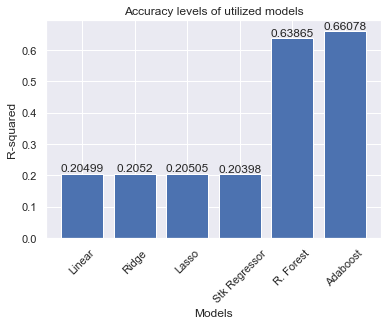

In [95]:
testing_r2 = [0.20499, 0.20520, 0.20505, 0.20398, 0.63865, 0.66078]
models = ['Linear', 'Ridge', 'Lasso', 'Stk Regressor', 'R. Forest', 'Adaboost']
plt.bar(models, testing_r2)
for i, value in enumerate(testing_r2):
    plt.text(i, value, str(value), ha='center', va='bottom')
plt.xlabel('Models')
plt.ylabel('R-squared')
plt.title('Accuracy levels of utilized models')
plt.xticks(rotation=45)
plt.savefig('modells3.png', dpi=500, bbox_inches = 'tight', pad_inches=1) 
plt.show() 

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [96]:
# discuss chosen methods logic

AdaBoostRegressor, short for Adaptive Boosting Regressor, is a machine learning algorithm used for regression tasks. To build a more powerful ensemble model, it integrates a number of "base" or "weak" regression models. AdaBoostRegressor works by repeatedly training weak models on various subsets of the training data and then giving more weight to the data points that the weak models are unable to accurately predict. As a result, succeeding models concentrate more on the data points that were incorrectly predicted in the earlier models, producing a more accurate final prediction.